In [167]:
from IPython.display import HTML

In [168]:
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

Populating the interactive namespace from numpy and matplotlib


/Users/haonan/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

In [90]:
%%R
library(lme4)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(tidyr)
library(ggpubr)

R[write to console]: Error in library(ggpubr) : there is no package called ‘ggpubr’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(ggpubr) : there is no package called ‘ggpubr’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


# Part 1: Rating task

In [74]:
data_rating = pd.read_csv('exp_rating_true_pilot.csv')
%R -i data_rating
#data_rating.head()

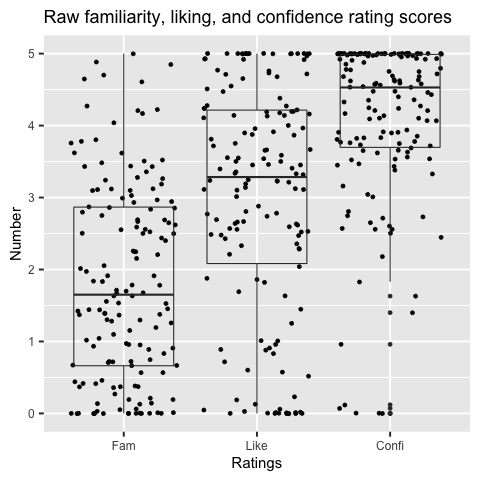

In [154]:
%%R
long_DF <- data_rating %>% gather(Ratings, Number, c(Fam, Like, Confi), factor_key = TRUE)
ggplot(long_DF, aes(Ratings, Number)) + geom_jitter() + stat_boxplot(fill = NA) + labs(title = "Raw familiarity, liking, and confidence rating scores") + theme(text = element_text(size=15))

In [97]:
# %%R
# data_rating %>% group_by(Participant) %>% summarize(mean=mean(Fam), min=min(Fam), max=max(Fam), q1=quantile(Fam, 0.25), q3=quantile(Fam, 0.75))

In [98]:
# %%R
# data_rating %>% group_by(Participant) %>% summarize(mean=mean(Like), min=min(Like), max=max(Like), q1=quantile(Like, 0.25), q3=quantile(Like, 0.75))

In [99]:
# %%R
# #confidence rating summary
# data_rating %>% group_by(Participant) %>% summarize(mean=mean(Confi), min=min(Confi), max=max(Confi), q1=quantile(Confi, 0.25), q3=quantile(Confi, 0.75))

*    <font size="4">The boxplot shows that subjects were generally able to use the full spectrum of rating scales. However, subjects often reported high confidence in their liking ratings. <font>

## Correlation plot

Text(0.5, 1.0, 'Correlations between familiarity, liking, and confidence of liking')

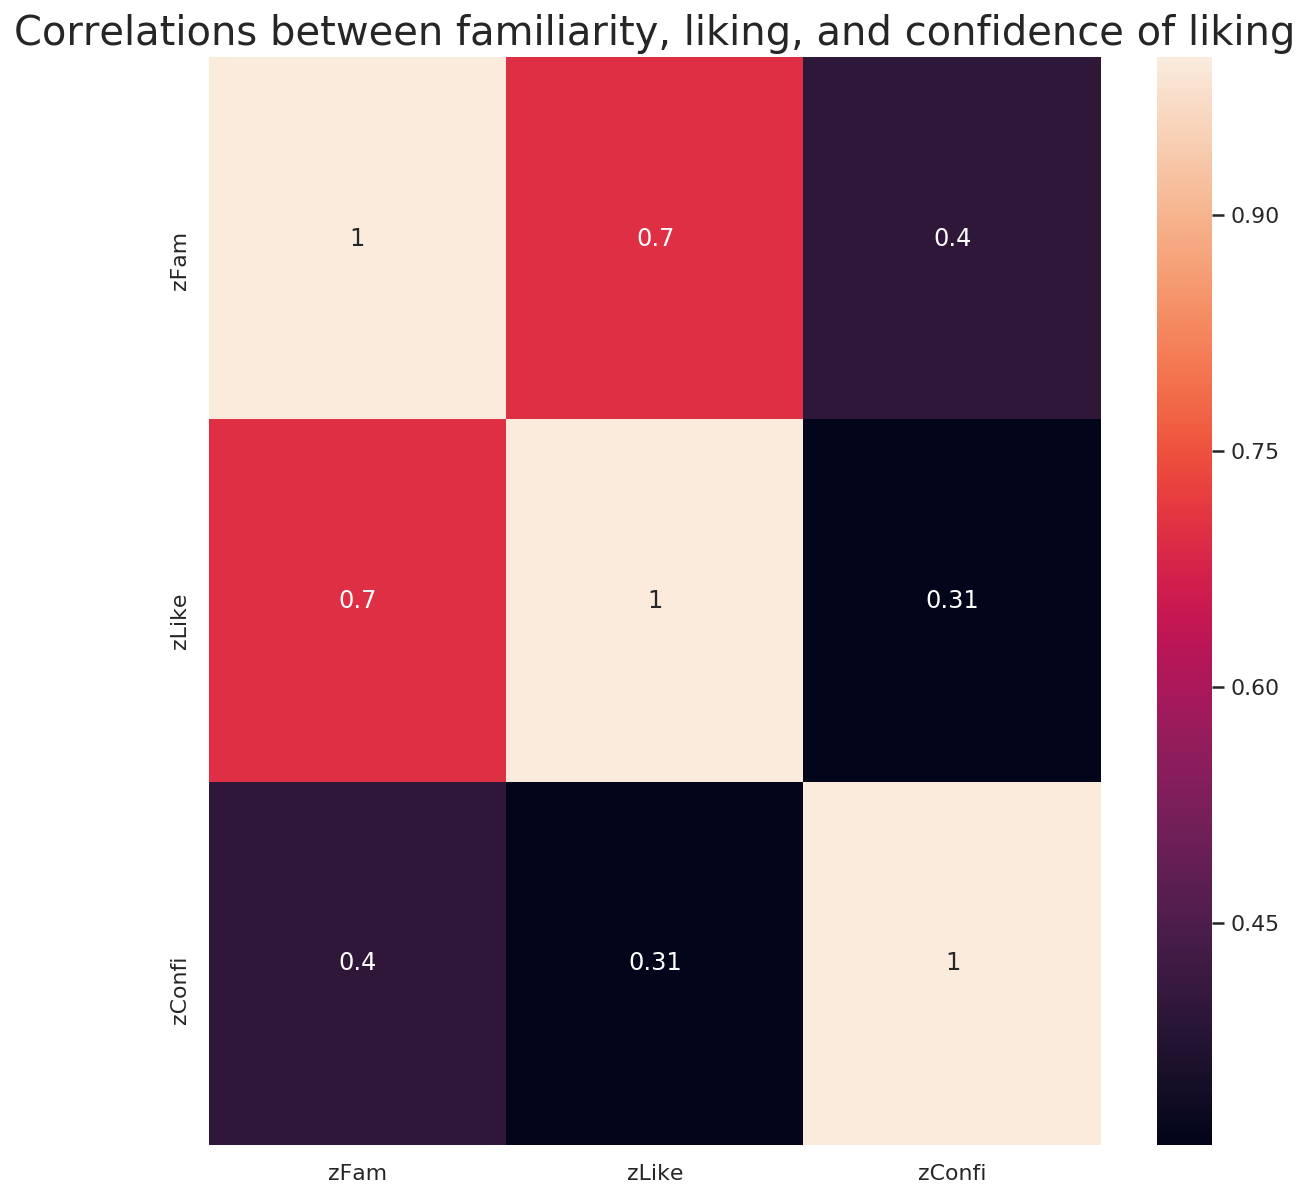

In [15]:

dataColsSelected = data_rating.loc[:,  ['zFam', 'zLike', 'zConfi']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(data_corr, 
       xticklabels=data_corr.columns,
       yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations between familiarity, liking, and confidence of liking',fontsize=20)
#sns.set(font_scale=0.8)

In [16]:
x_variable = 'zLike'
x_varlabel = 'Liking'
y_variable = 'zConfi'
y_varlabel =  'Confidence'

Pearson's r = 0.309 p =  0.0


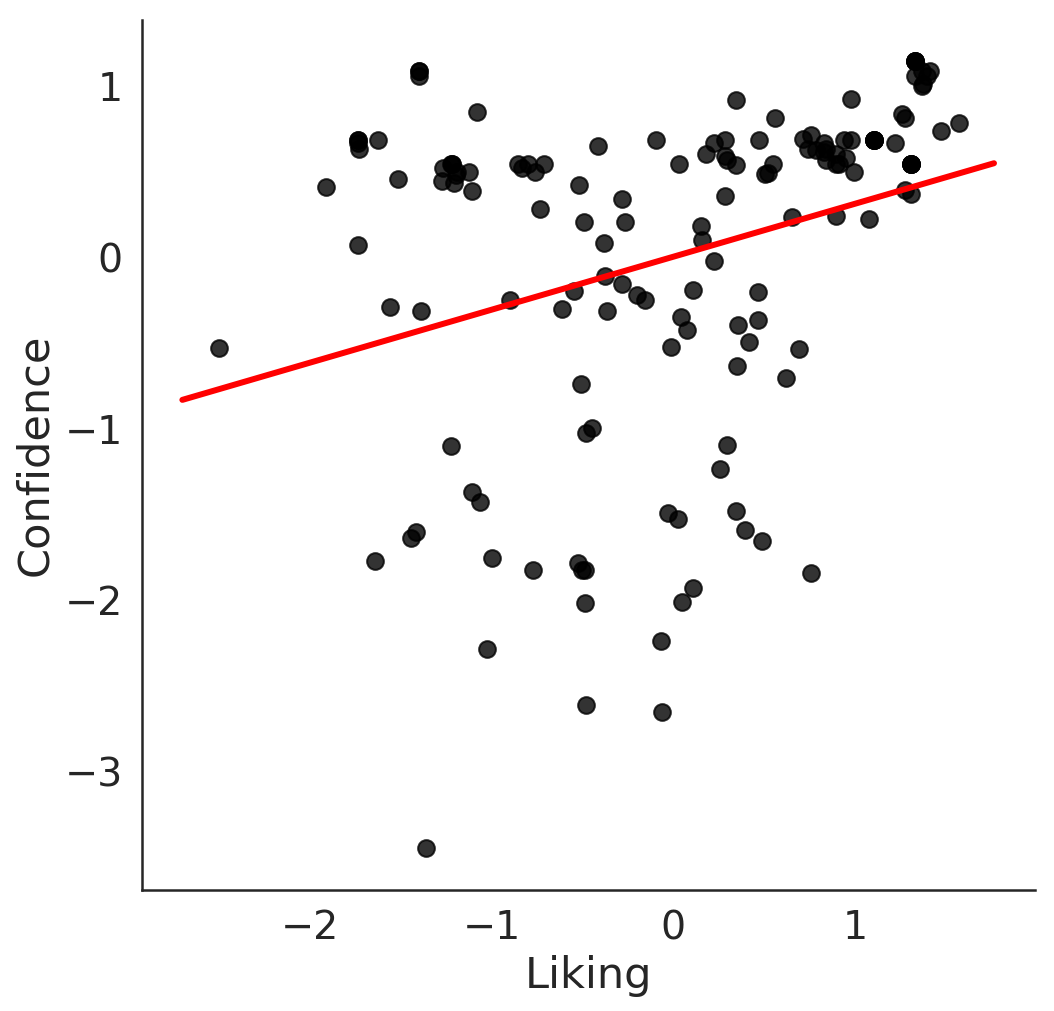

In [17]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_rating, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_rating[x_variable]
y=data_rating[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_rating[x_variable], data_rating[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

*    <font size="4">Unlike my first pilot study, here confidence only moderately correlates with liking and familiarity ratings. <font>

# Part 2: preference task

In [103]:
data_trans = pd.read_csv('exp_trans_true_pilot.csv')
#print(list(data_trans))
%R -i data_trans


## Correlation plot

Text(0.5, 1.0, 'Correlations in preference task')

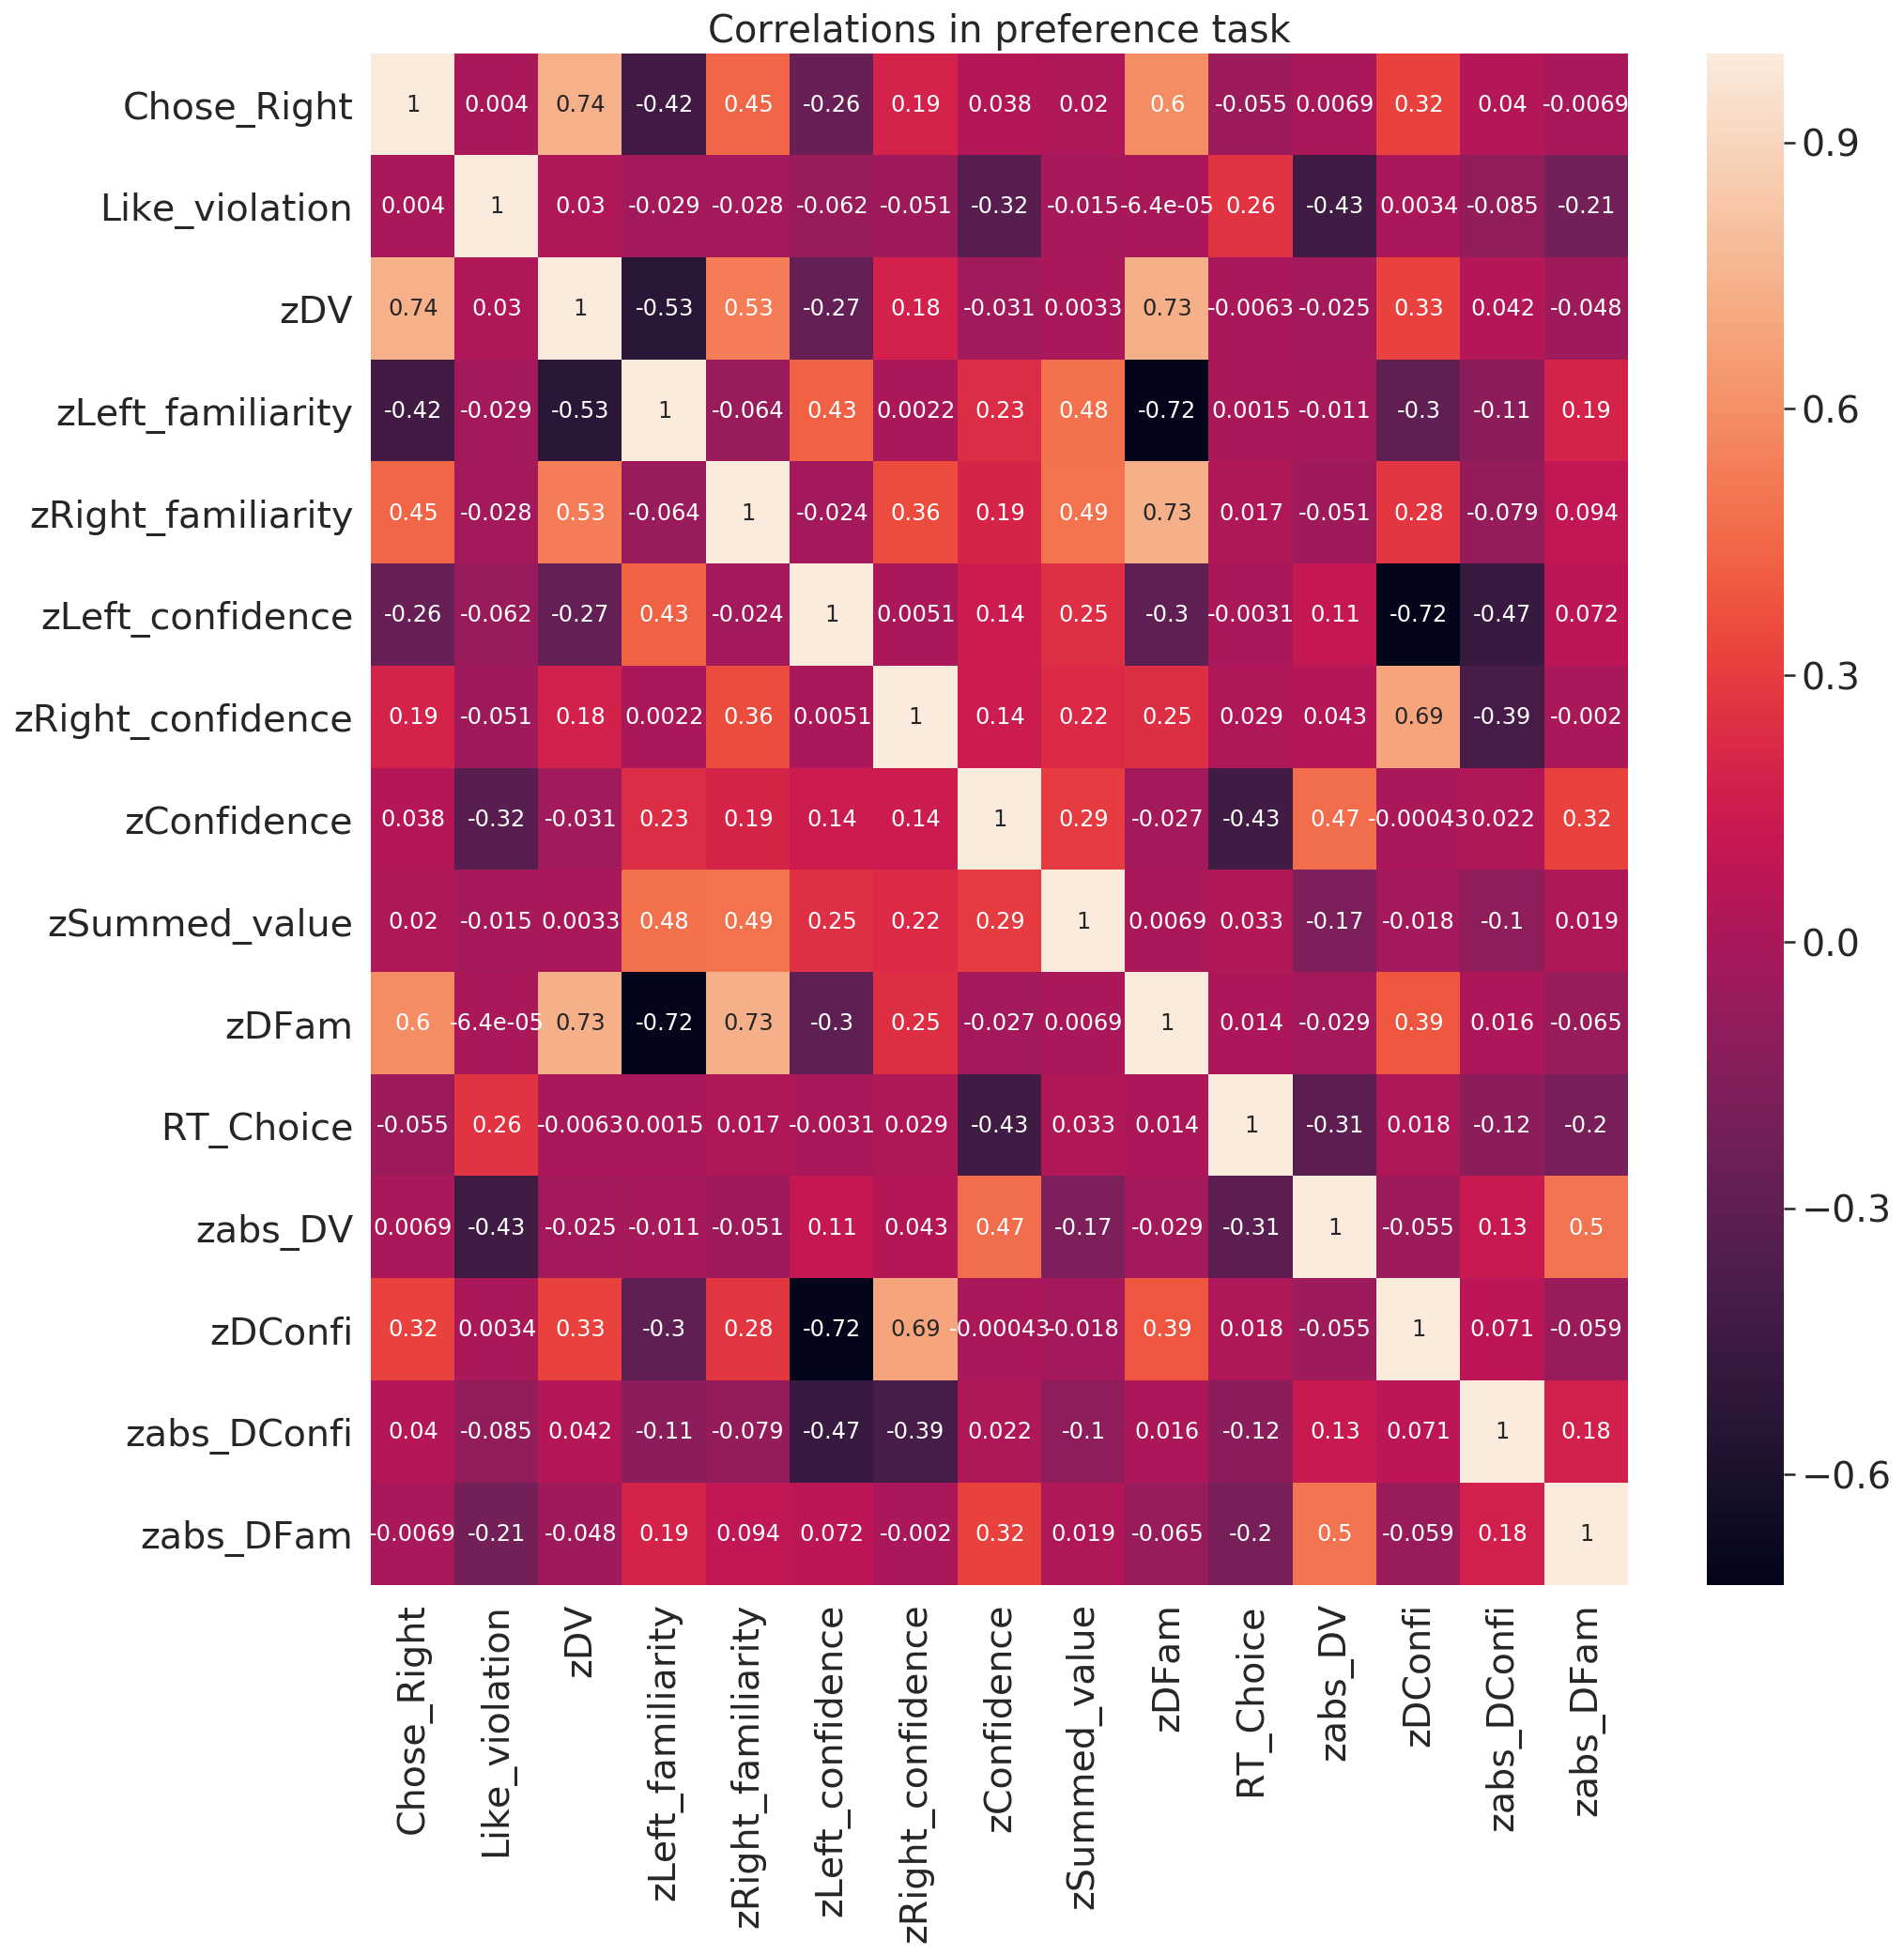

In [104]:
dataColsSelected = data_trans.loc[:,  ['Chose_Right','Like_violation', 'zDV', 'zLeft_familiarity', 'zRight_familiarity', 'zLeft_confidence', 'zRight_confidence', 'zConfidence', 'zSummed_value', 'zDFam', 'RT_Choice', 'zabs_DV', 'zDConfi', 'zabs_DConfi', 'zabs_DFam']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data_corr, 
    xticklabels=data_corr.columns,
     yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations in preference task',fontsize=20)

<font size = '4'> The significance of correlation between DFam and Chose Right<font>

In [105]:
x_variable = 'zDFam'
x_varlabel = 'Difference in Familiarity'
y_variable = 'Chose_Right'
y_varlabel =  'Chose Right'

Pearson's r = 0.596 p =  0.0


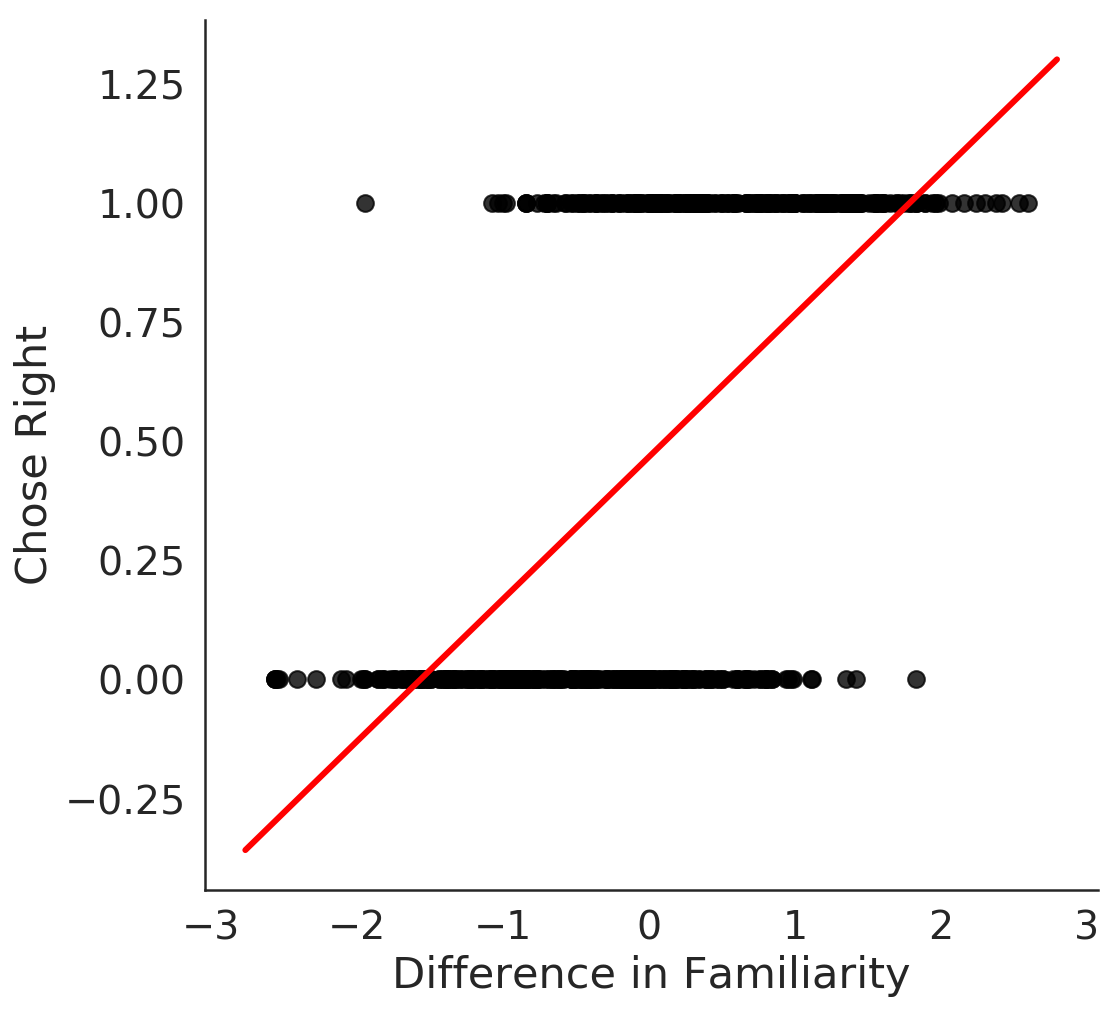

In [106]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_trans, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_trans[x_variable]
y=data_trans[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_trans[x_variable], data_trans[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

<font size = '5'> **Confidence modulation of |DV| on choosing the right item** <font>

/Users/haonan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Low measure:logit coef = [[2.78699565]] ; Intercept:  [-0.28718983]
high measure:logit coef = [[5.35605517]] ; Intercept:  [-0.43398056]


/Users/haonan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


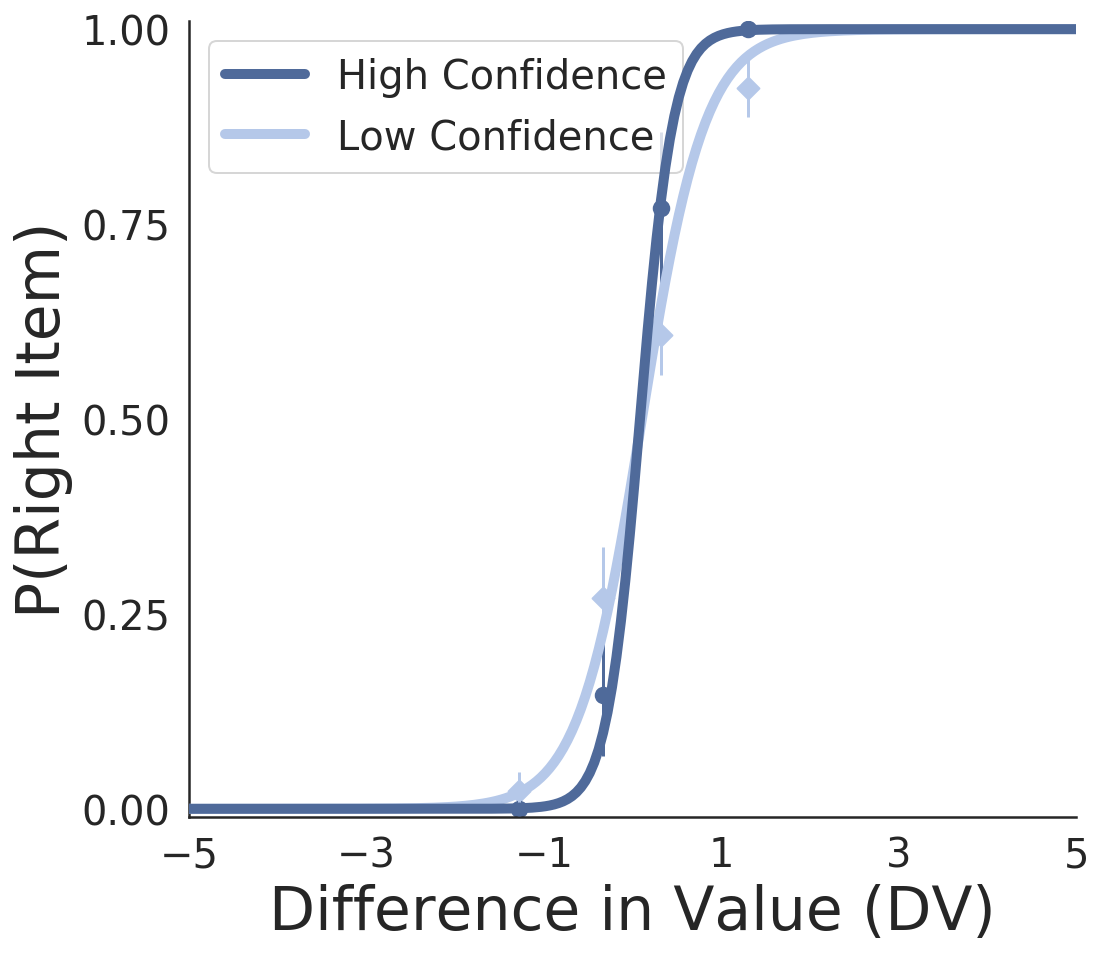

In [107]:
logisticplot_all('zConfidence_dich', 'High Confidence', 'Low Confidence', data=data_trans, xaxis='zDV', yaxis='Chose_Right', ylab='P(Right Item)', xlab='Difference in Value (DV)',
                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Participant')
plt.tight_layout()

<font size = '4'> Low confidence is associated with more preference violations (%) <font>

In [108]:
%%R
proportions = prop.table(table(data_trans$Like_violation, data_trans$zConfidence_dich), 1)
rownames(proportions) = c('Transitive Trials', 'Preference Violations')
colnames(proportions) = c('Low Confidence', 'High Confidence')
round(proportions*100, 2)

                       
                        Low Confidence High Confidence
  Transitive Trials              44.49           55.51
  Preference Violations          77.65           22.35


## Regression Analysis
<font size = '5'> Predictors of choosing the right item <font>

In [113]:
%%R
model_choice = glm(Chose_Right ~ zDV + zDFam + zDConfi + zConfidence + zSummed_value+ zDV:zConfidence + zDV:zSummed_value, data=data_trans, family=binomial(link="logit"))
fix_1a <- coef(model_choice)
fix_se_1a <- sqrt(diag(vcov(model_choice)))
names_1a <- names(fix_1a)
summary(model_choice)


Call:
glm(formula = Chose_Right ~ zDV + zDFam + zDConfi + zConfidence + 
    zSummed_value + zDV:zConfidence + zDV:zSummed_value, family = binomial(link = "logit"), 
    data = data_trans)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.54334  -0.31311  -0.00857   0.24787   2.22551  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.29958    0.17262  -1.736 0.082645 .  
zDV                3.94501    0.45508   8.669  < 2e-16 ***
zDFam              0.51674    0.22541   2.292 0.021881 *  
zDConfi            0.23070    0.17923   1.287 0.198018    
zConfidence        0.08382    0.15986   0.524 0.600034    
zSummed_value     -0.06018    0.12851  -0.468 0.639584    
zDV:zConfidence    1.49261    0.40802   3.658 0.000254 ***
zDV:zSummed_value  0.17908    0.40938   0.437 0.661797    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null devia

In [115]:
#data_trans = data_trans.drop('DVBin2', axis = 1)
%R -i data_trans

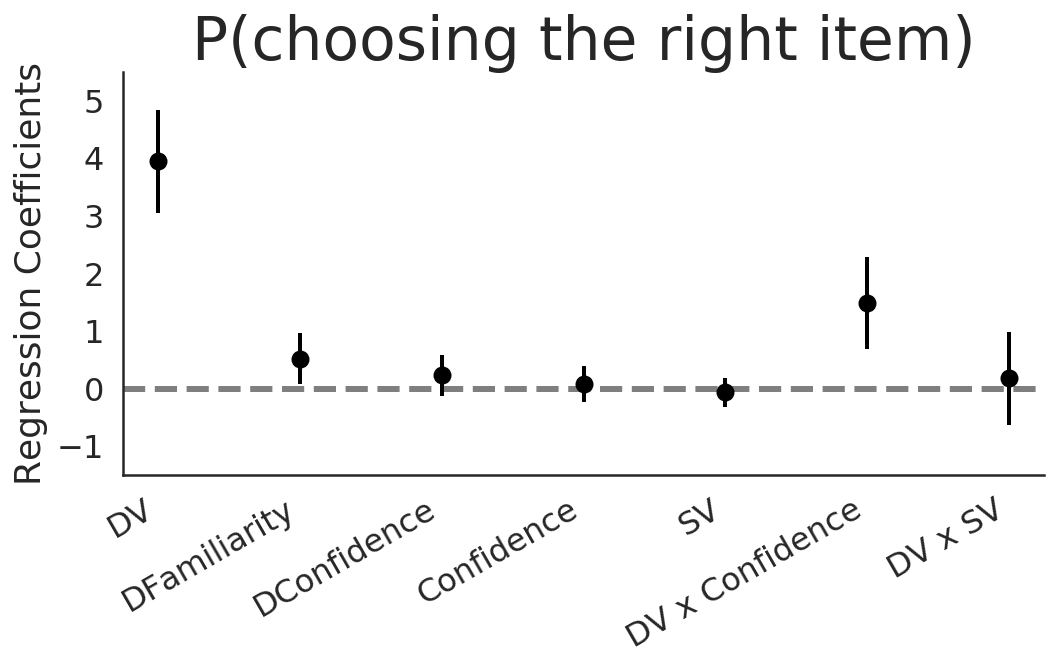

In [114]:
%R -o fix_1a -o fix_se_1a -o names_1a
choice_table_exp1 = regtable(fix_1a, fix_se_1a, names_1a)
choice_table_exp1
cols = ['(Intercept)', 'zDV', 'zDFam', 'zDConfi', 'zConfidence', 'zSummed_value', 'zDV:zConfidence', 'zDV:zSummed_value']
choice_table_exp1 = choice_table_exp1[cols]
choice_table_exp1.columns = ['Intercept', 'DV', 'DFamiliarity', 
                             'DConfidence', 'Confidence', 'SV', 'DV x Confidence', 'DV x SV']
Coefpresplot(choice_table_exp1, title='P(choosing the right item)', ticklabsize=16, size='narrow',
             ylimits=(-1.5, 5.5), ymultiple=1, n_ET_predictors=1)

*  <font size = '4'> As the analysis shows, DV(right item - left item), DFamiliarity (right item - left item), and interaction between DV and confidence are the significant positive predictors of choosing the right option. <font>

<font size = '5'> Predictors of preference violation <font>

In [118]:
%%R
model_viol = glm(Like_violation ~ zabs_DV + zConfidence + RT_Choice + zabs_DV:zConfidence + zabs_DConfi + zabs_DFam, data=data_trans, family=binomial(link="logit"))
fix_1b <- coef(model_viol)
fix_se_1b <- sqrt(diag(vcov(model_viol)))
names_1b <- names(fix_1b)
summary(model_viol)


Call:
glm(formula = Like_violation ~ zabs_DV + zConfidence + RT_Choice + 
    zabs_DV:zConfidence + zabs_DConfi + zabs_DFam, family = binomial(link = "logit"), 
    data = data_trans)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.52047  -0.41775  -0.08681  -0.00397   2.67454  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -4.45603    0.54447  -8.184 2.74e-16 ***
zabs_DV             -3.29930    0.48115  -6.857 7.02e-12 ***
zConfidence         -1.53336    0.35904  -4.271 1.95e-05 ***
RT_Choice            0.09108    0.04980   1.829   0.0674 .  
zabs_DConfi          0.17614    0.17603   1.001   0.3170    
zabs_DFam           -0.12655    0.19449  -0.651   0.5153    
zabs_DV:zConfidence -1.35252    0.34764  -3.891   0.0001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 484.61  on 583  degrees of freedom
Residual

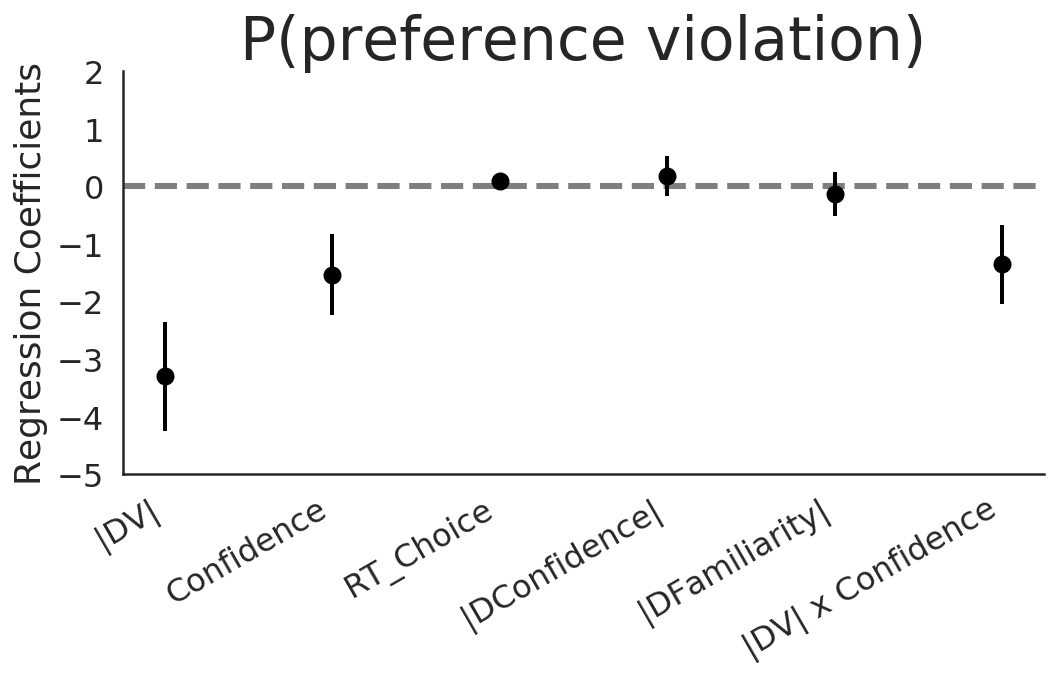

In [119]:
%R -o fix_1b -o fix_se_1b -o names_1b
choice_table_exp1 = regtable(fix_1b, fix_se_1b, names_1b)
choice_table_exp1
cols = ['(Intercept)', 'zabs_DV', 'zConfidence', 'RT_Choice', 'zabs_DConfi', 'zabs_DFam', 'zabs_DV:zConfidence']
choice_table_exp1 = choice_table_exp1[cols]
choice_table_exp1.columns = ['Intercept', '|DV|', 'Confidence', 
                             'RT_Choice', '|DConfidence|', '|DFamiliarity|', '|DV| x Confidence']
Coefpresplot(choice_table_exp1, title='P(preference violation)', ticklabsize=16, size='narrow',
             ylimits=(-5, 2), ymultiple=1, n_ET_predictors=0)

<font size = '4'>*    A preference violation is considered when participants select the lower valued fruit in the preference task. The values of fruits are derived from liking ratings in the rating task. The violated trials are encoded as "1", while non-violated trials are encoded as "0". <font>


<font size = '4'>*    Participants made fewer violations when the absolute difference in value of two fruits are higher, or when participants are confident about their choice. There was an interaction between the absolute difference in value and the choice confidence that further decreases preference violation.<font>


# Part2: Associative Inference test

In [166]:
data_infer = pd.read_csv('exp_infer_true_pilot.csv')
#print(list(data_infer))

<font size = '5'> **Comparison among direct association tests, indirect association test (ACtest) and preference violation** <font>

Text(0.5, 1.0, 'Correlations among performance of association tests and transitive violation')

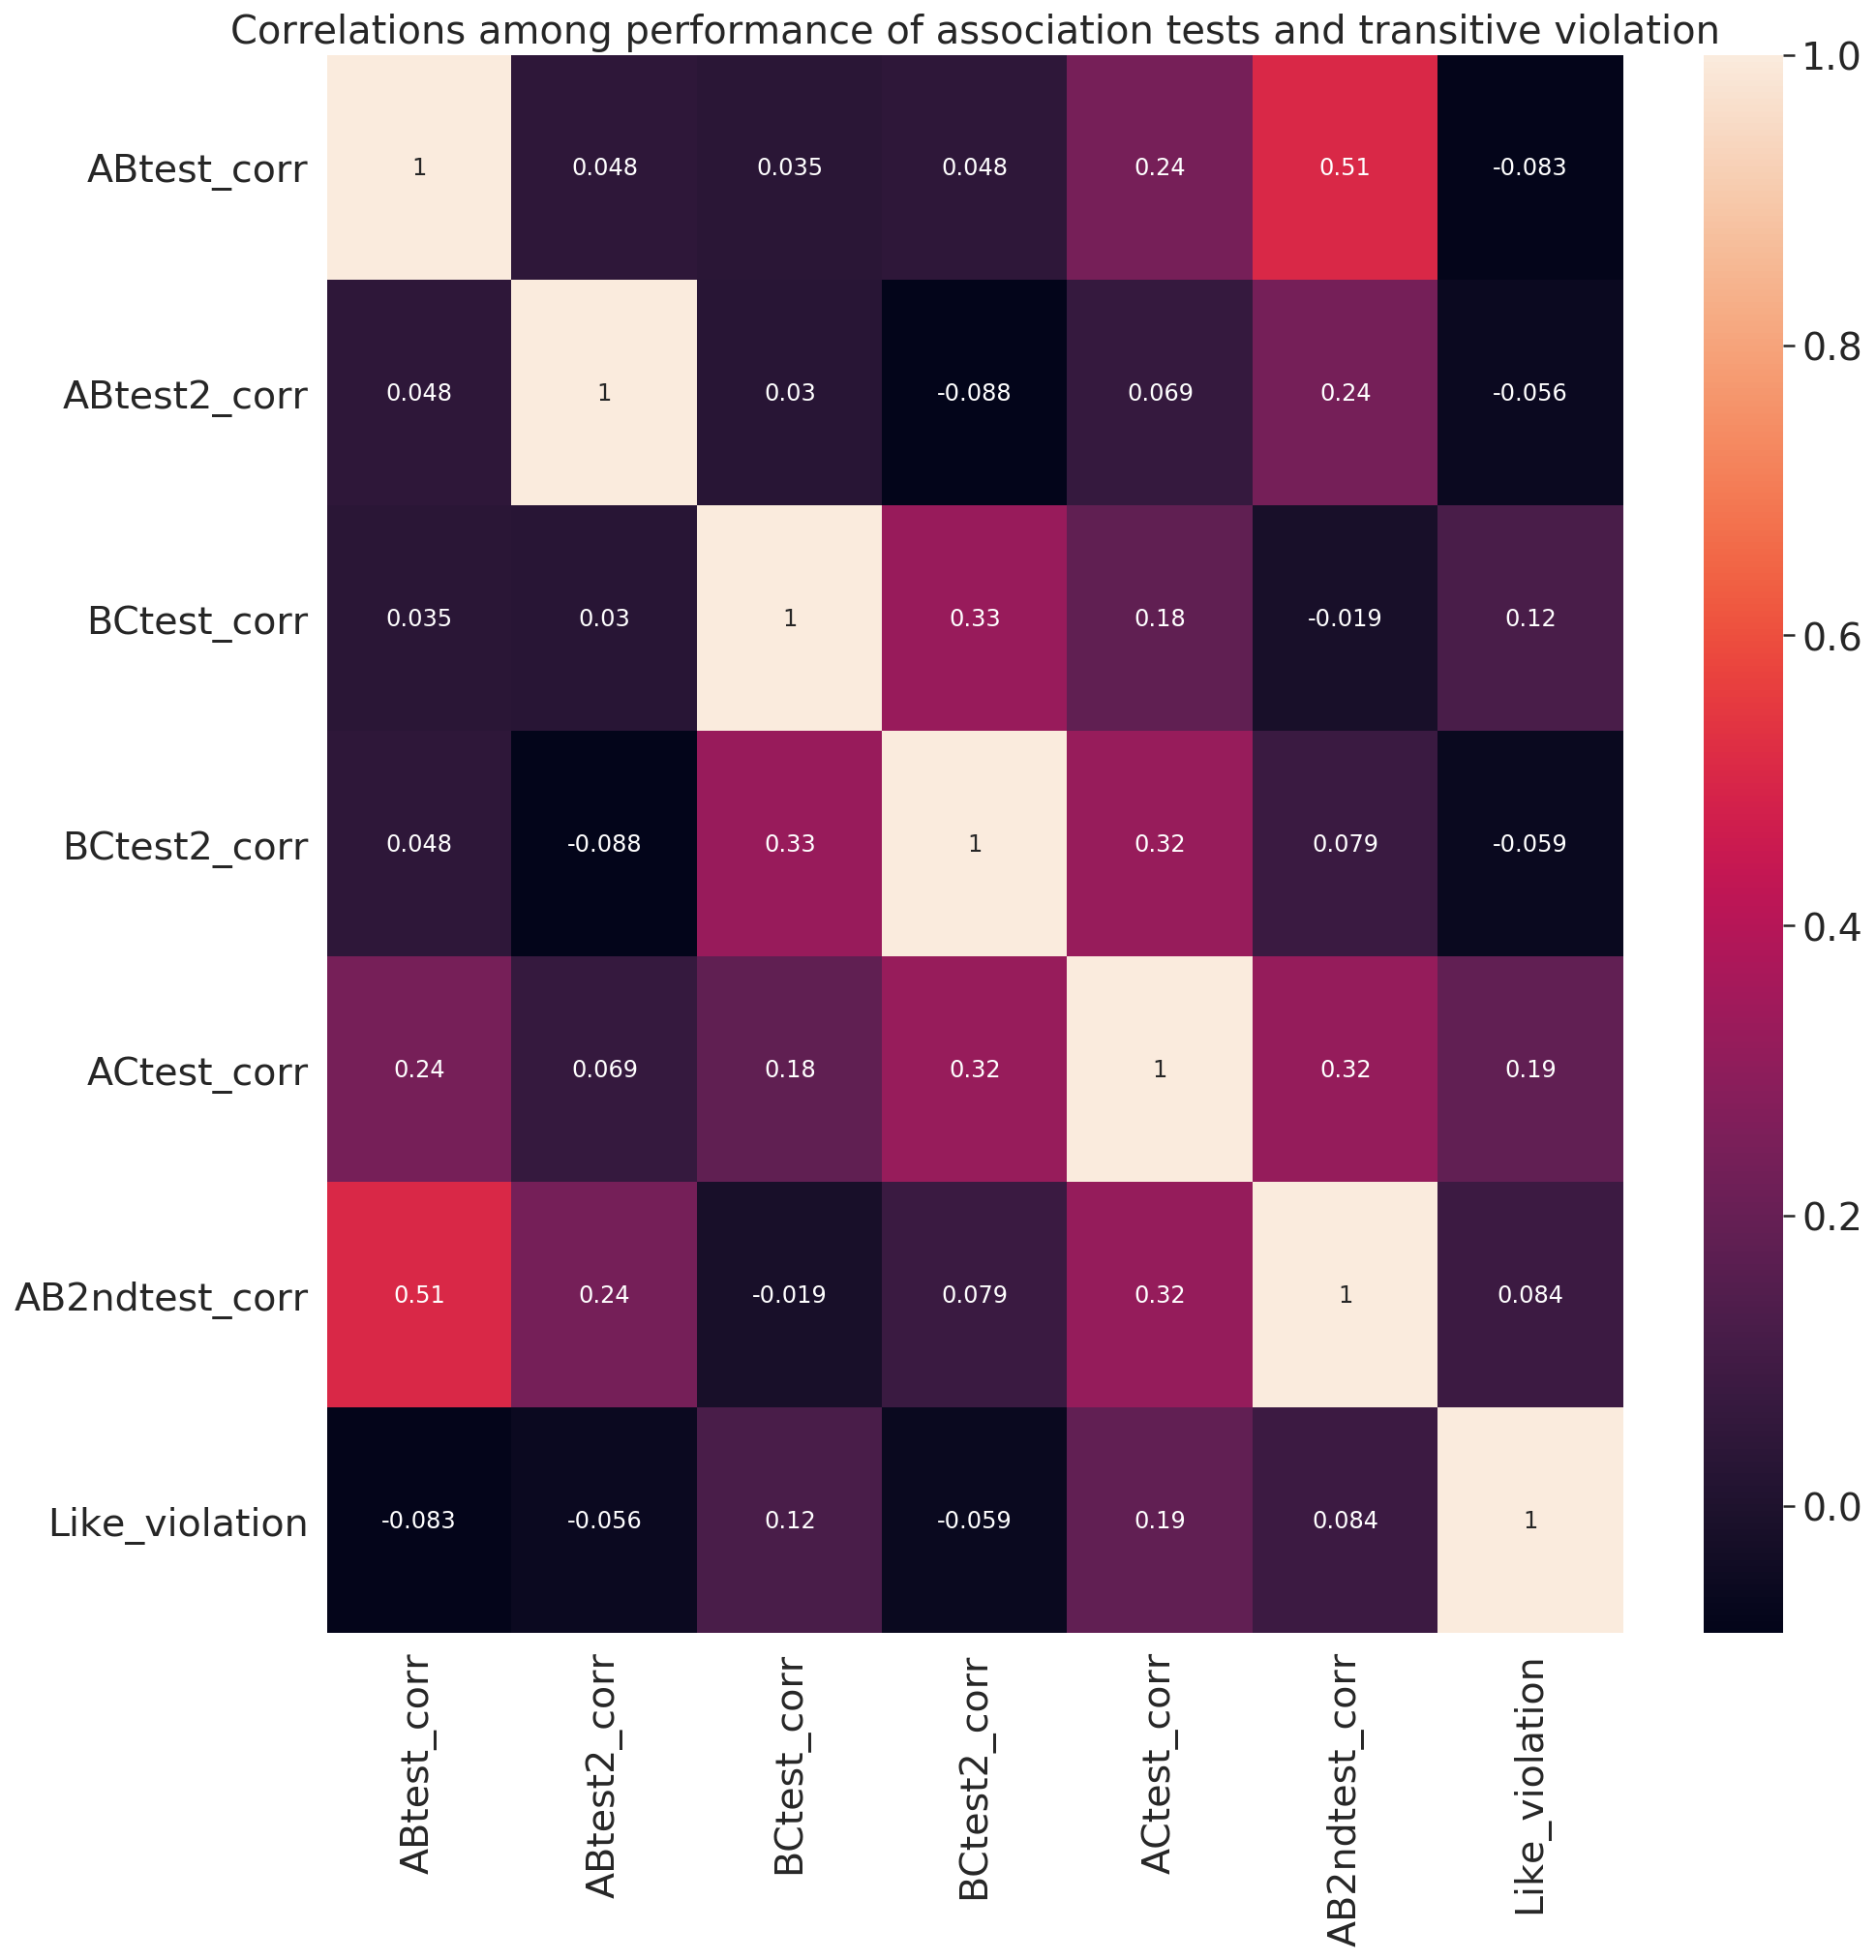

In [25]:
dataColsSelected = data_infer.loc[:,  ['ABtest_corr','ABtest2_corr', 'BCtest_corr', 'BCtest2_corr', 'ACtest_corr', 'AB2ndtest_corr', 'Like_violation']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data_corr, 
    xticklabels=data_corr.columns,
     yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations among performance of association tests and transitive violation',fontsize=20)

<font size = '4'>

* It's interesting to note that the performance of AB test administered at the end ('AB2ndtest_corr') correlated highly with the first round of AB test ('ABtest_corr'), but only mildly with the second round of AB test ('ABtest2_corr'). Also, the second round of AB test did not correlate with AC inference test ('ACtest_corr'). It could be due to the fact that new BC associations interfere with AB associative memory, degrading weak associations but leaving strong associations unaffected.


* Transitive violation has no modulating effect on associative memory test performance. 
<font>

<font size = '5'> **Test of Dependence  on Direct Association in Associative Inference** <font>

<font size = '4'>The above correlation plot also shows that indirect association test performance (ACtest_corr) was moderately correlated with the second round of BC association test performance (BCtest2_corr) and the final round of AB recognition test performance (AB2ndtest_corr). I decided to use chi-square test to further examine this dependence. <font>

In [27]:
%R -i data_infer

In [28]:
%%R
AC.data <- data.frame(data_infer$BCtest2_corr, data_infer$ACtest_corr)

# Create a table with the needed variables.
AC.data = table(data_infer$BCtest2_corr, data_infer$ACtest_corr) 

names(dimnames(AC.data)) = c('BCtest2', '     ACtest')
rownames(AC.data) = c('wrong', 'correct')
colnames(AC.data) = c('wrong', 'correct')
print(AC.data)
print(chisq.test(AC.data))


              ACtest
BCtest2   wrong correct
  wrong       7       2
  correct    20      46

	Pearson's Chi-squared test with Yates' continuity correction

data:  AC.data
X-squared = 5.8241, df = 1, p-value = 0.01581



In [29]:
%%R
AC2.data <- data.frame(data_infer$AB2ndtest_corr, data_infer$ACtest_corr)

# Create a table with the needed variables.
AC2.data = table(data_infer$AB2ndtest_corr, data_infer$ACtest_corr) 

names(dimnames(AC2.data)) = c('AB2ndtest', '     ACtest')
rownames(AC2.data) = c('wrong', 'correct')
colnames(AC2.data) = c('wrong', 'correct')
print(AC2.data)
print(chisq.test(AC2.data))

              ACtest
AB2ndtest wrong correct
  wrong       8       3
  correct    19      45

	Pearson's Chi-squared test with Yates' continuity correction

data:  AC2.data
X-squared = 5.7945, df = 1, p-value = 0.01608



In [43]:
# %%R
# AC3.data <- data.frame(data_infer$ABtest2_corr, data_infer$AB2ndtest_corr)

# # Create a table with the needed variables.
# AC3.data = table(data_infer$ABtest2_corr, data_infer$AB2ndtest_corr) 

# names(dimnames(AC3.data)) = c('ABtest2', '     AB2ndtest')
# rownames(AC3.data) = c('wrong', 'correct')
# colnames(AC3.data) = c('wrong', 'correct')
# print(AC3.data)
# print(chisq.test(AC3.data))

In [48]:
%%R
model_AC_d = glm(ACtest_corr ~  BCtest2_corr + AB2ndtest_corr, data=data_infer, family=binomial(link="logit"))
summary(model_AC_d)


Call:
glm(formula = ACtest_corr ~ BCtest2_corr + AB2ndtest_corr, family = binomial(link = "logit"), 
    data = data_infer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6803  -0.8807   0.7475   0.7475   1.6173  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -2.8720     1.0821  -2.654  0.00795 **
BCtest2_corr     2.1248     0.8714   2.438  0.01475 * 
AB2ndtest_corr   1.8795     0.7563   2.485  0.01295 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.013  on 74  degrees of freedom
Residual deviance: 83.619  on 72  degrees of freedom
AIC: 89.619

Number of Fisher Scoring iterations: 4



In [123]:
%%R
model_AC_f = glm(ACtest_corr ~  ABtest_corr, data=data_infer, family=binomial(link="logit"))
summary(model_AC_f)


Call:
glm(formula = ACtest_corr ~ ABtest_corr, family = binomial(link = "logit"), 
    data = data_infer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5380  -1.2617   0.8555   0.8555   1.3824  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.4700     0.5701  -0.824   0.4097  
ABtest_corr   1.2868     0.6332   2.032   0.0421 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.013  on 74  degrees of freedom
Residual deviance: 93.736  on 73  degrees of freedom
AIC: 97.736

Number of Fisher Scoring iterations: 4



<font size = '4'>

* From the results of chi-squared tests, the AC test performance was significantly dependent on the performance of both the second round of BC test and the final round of AB recognition test. Both relationships are positive: participants were more likely to correctly infer the link between two kinds of fruits if the fruit C-container pair was remembered till the second round of BC test and if the memory of fruit A-container pair was retained till the end of the experiment.


* The first round of AB test (ABtest_corr) also significantly predicted the AC test performance. However, I suspect the significance would be minimal if more data were collected.
<font>

<font size = '5'> **Predictors of AC test** <font>

<font size = '4'>Next, I want to find the factors modulating trial-by-trial associative inference performance ('ACtest_corr'). One hypothesis is that subjects selected the fruit they know best (highest in familiarity or liking) when they were not sure about the correct pairing. I ranked the three choices in their respective familiarity ('selected_fam_rank'), liking ('selected_like_rank') and confidence ('selected_confi_rank') as [1, 2, 3] (where 1 = lowest and 3 = highest). I also calculated the difference between selected option and the average of two unselected options ('zACtest_selected_DV', 'zACtest_selected_DFam', 'zACtest_selected_DConf'). Furthermore, I included the position of selected image (0 = left, 1 = middle, 2 = right) in the correlation plot below. <font>

Text(0.5, 1.0, 'Correlations between inference test performance and properties of selected fruit')

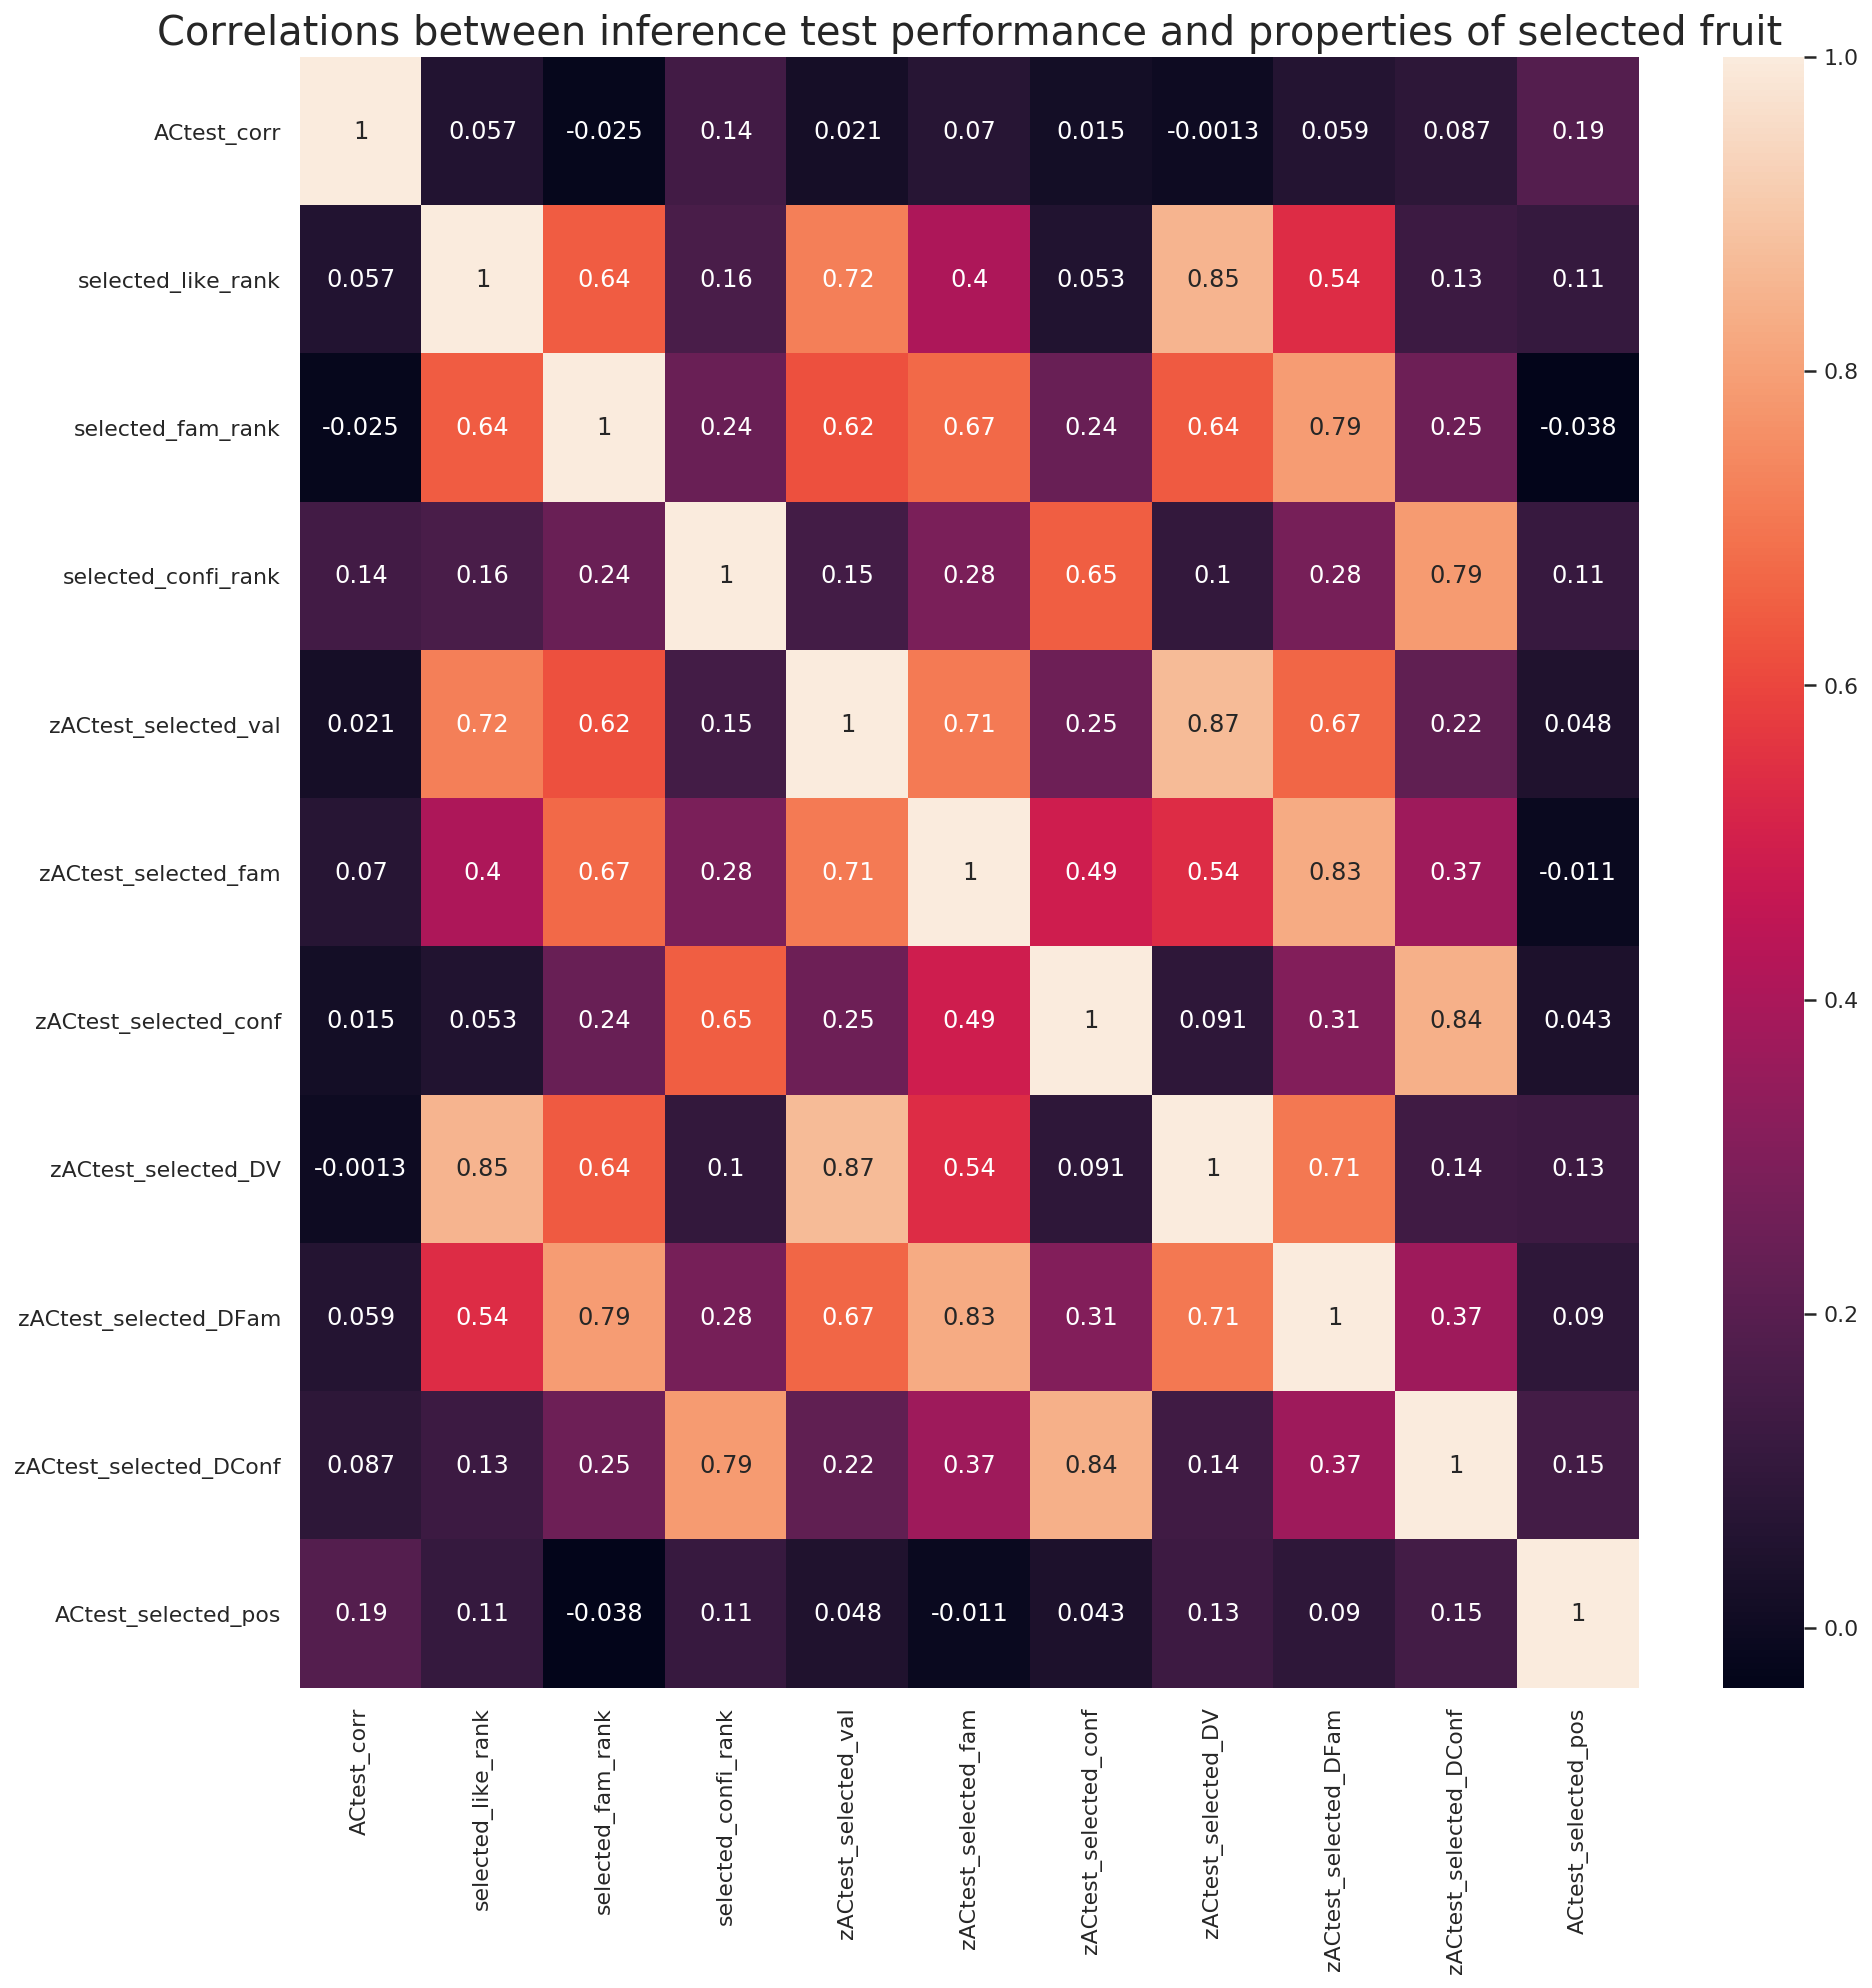

In [126]:
dataColsSelected = data_infer.loc[:,  [ 'ACtest_corr', 'selected_like_rank', 'selected_fam_rank', 'selected_confi_rank', 'zACtest_selected_val', 'zACtest_selected_fam', 'zACtest_selected_conf', 'zACtest_selected_DV', 'zACtest_selected_DFam', 'zACtest_selected_DConf','ACtest_selected_pos'
                                      ]]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data_corr, 
    xticklabels=data_corr.columns,
     yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations between inference test performance and properties of selected fruit',fontsize=20)

<font size = '4'>
    
* The above plot shows that properties of selected fruits did not predict AC test performance.
<font>

In [138]:
# %%R
# tab_fam <- table(data_infer$ACtest_corr, data_infer$selected_fam_rank)
# tab_fam <- scale(tab_fam, FALSE, colSums(tab_fam)) * 100
# bp <- barplot(tab_fam, beside=TRUE, axes=FALSE, xlab="Selected Fam Rank", names=c("1", "2", "3"), col=c("azure3", "azure"), ylab="Frequency (%)", ylim=c(0,100))
# axis(2, at=seq(0,100,10))
# legend("topright", legend=c("Wrong", "Right"), bty="n", fill=c("azure3", "azure"))
# text(bp, 0, round(tab_fam, 1), cex=1, pos=3)

In [63]:
# %%R
# #Number of correct and wrong AC test trials grouped by selected option's familiarity rank
# df <- data.frame(table(data_infer$selected_like_rank,data_infer$ACtest_corr))
# names(df) <- c("selected_like_rank","ACtest_corr","Count")
# ggplot(data=df, aes(x=selected_like_rank, y=Count, fill=ACtest_corr)) + geom_bar(stat="identity") + scale_fill_discrete(
#                        name="AC test", breaks=c("0", "1"), labels=c("Wrong", "Correct"))

<font size = '4'>
Then, I hypothesized that some relationship might exist between AC test performance and properties of fruit A and fruit C...
    <font>

Text(0.5, 1.0, 'Correlations between inference test performance and properties of fruit A and fruit C')

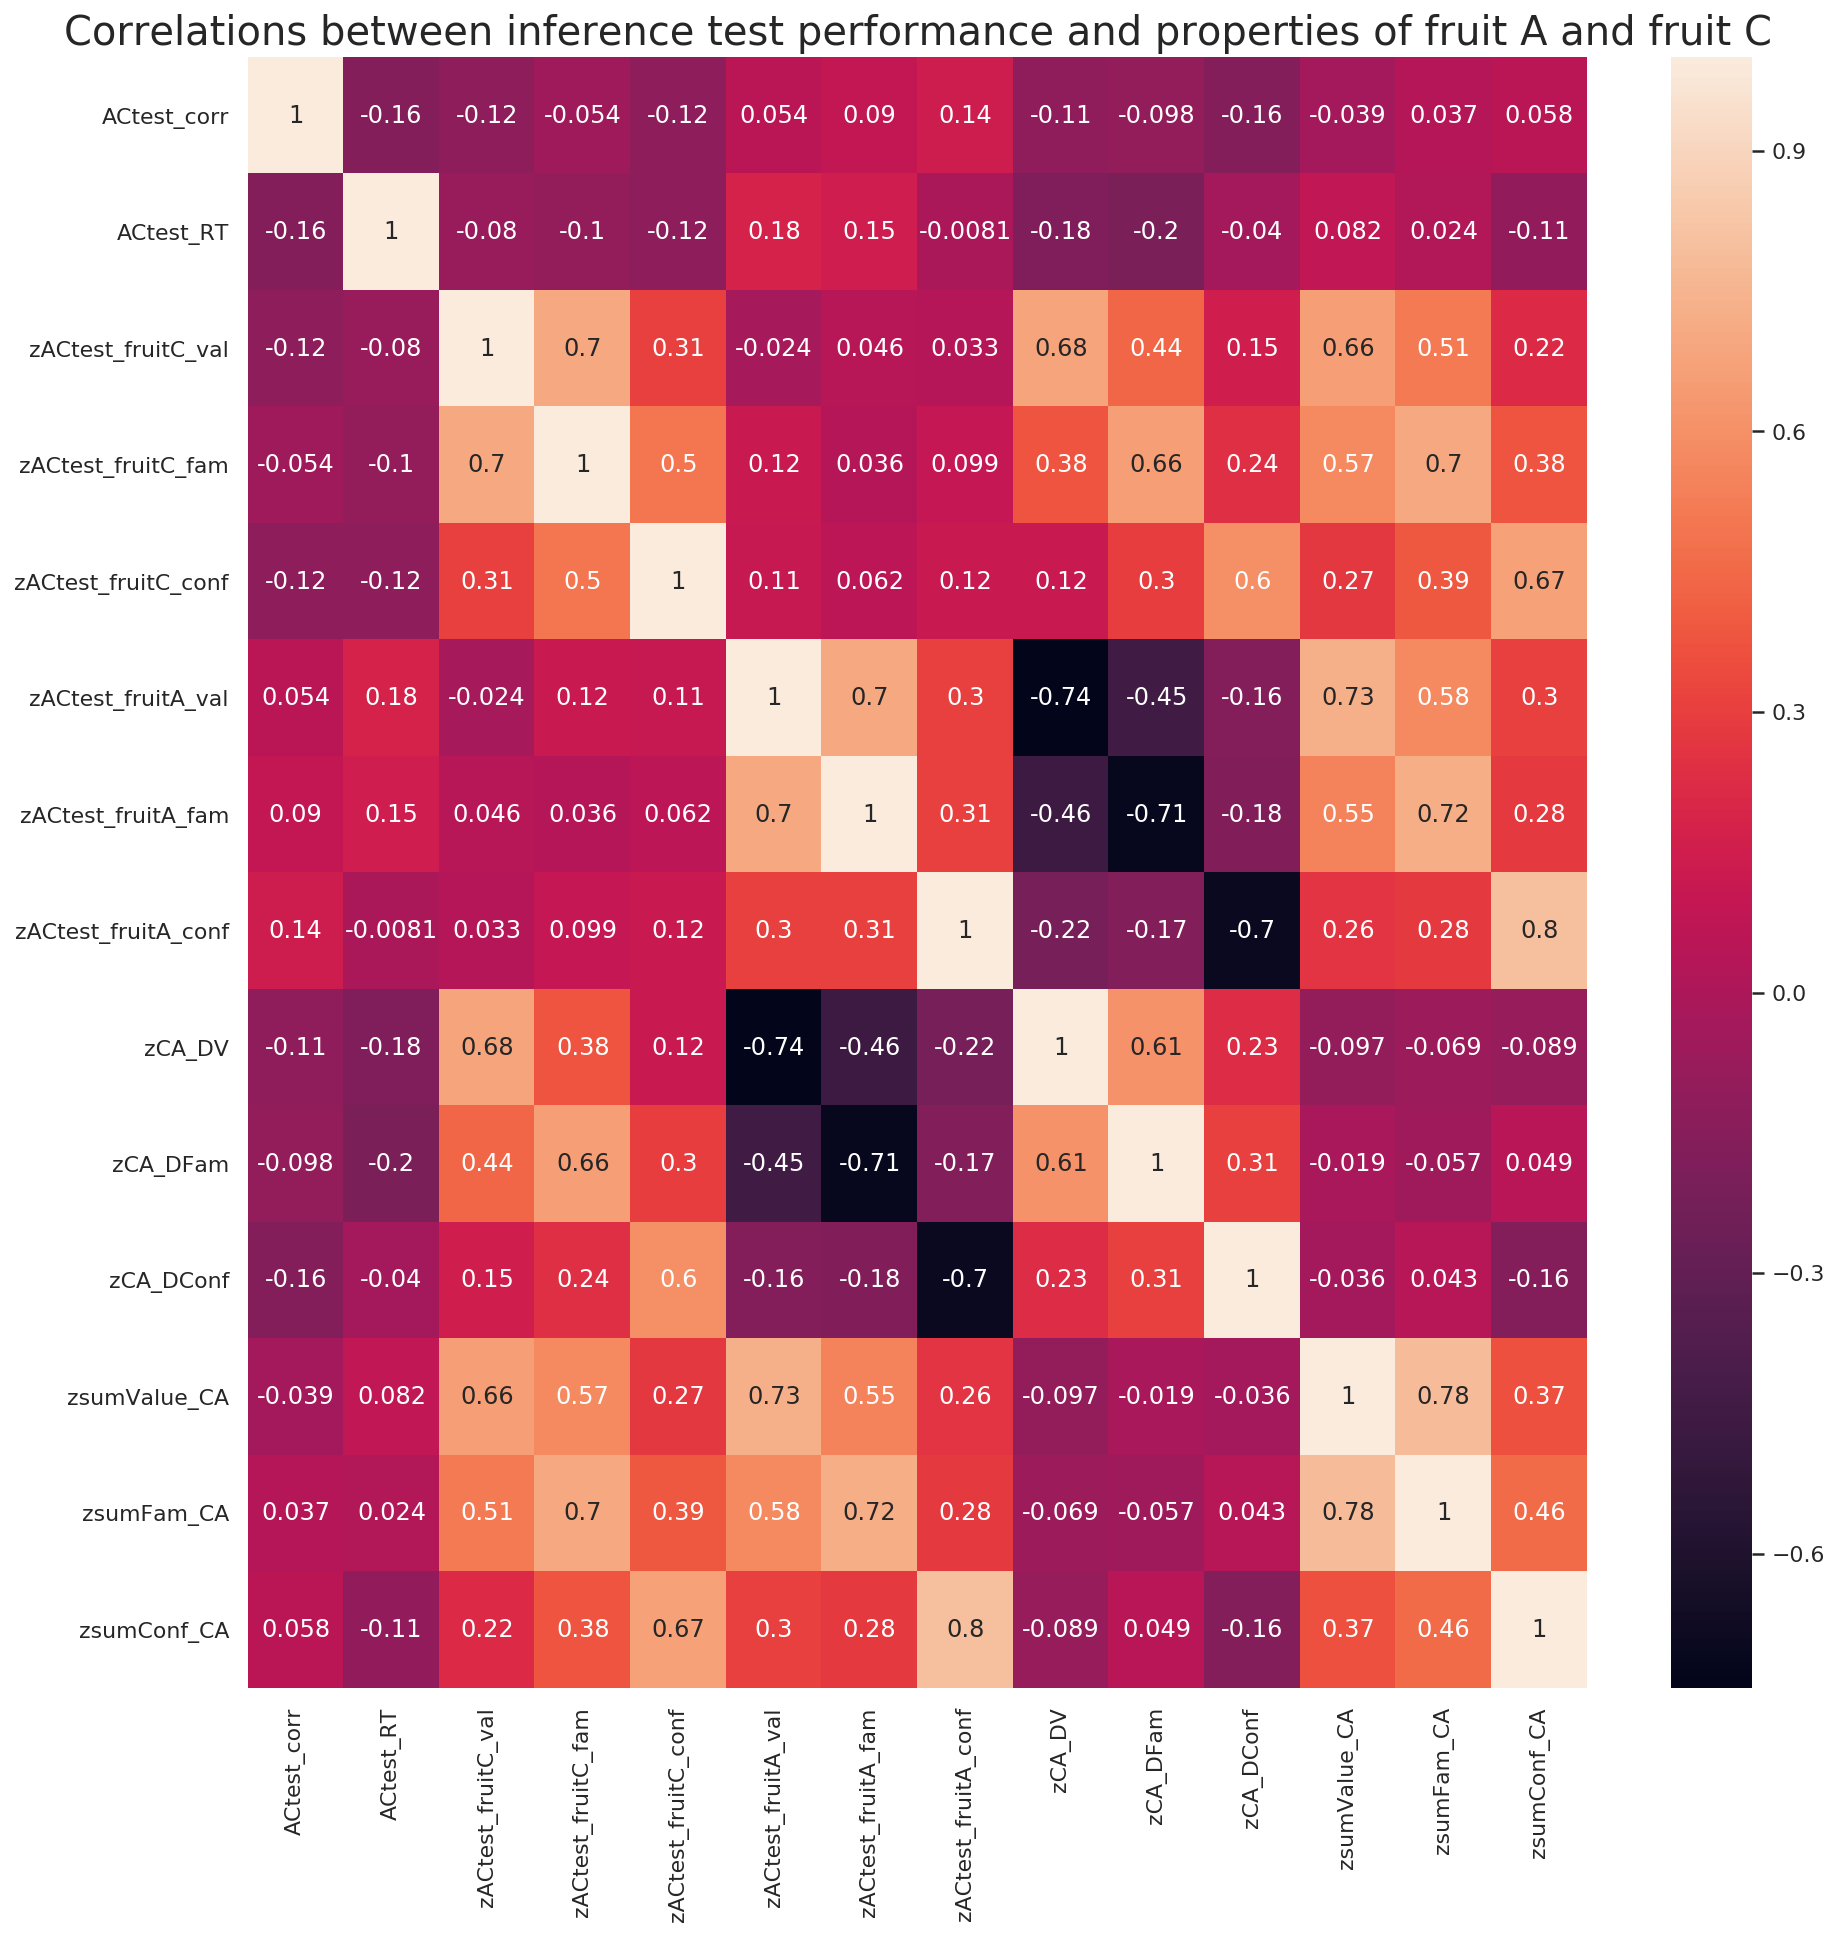

In [125]:
dataColsSelected = data_infer.loc[:,  [ 'ACtest_corr',  'ACtest_RT', 'zACtest_fruitC_val', 'zACtest_fruitC_fam', 'zACtest_fruitC_conf', 'zACtest_fruitA_val', 'zACtest_fruitA_fam', 'zACtest_fruitA_conf', 'zCA_DV', 'zCA_DFam', 'zCA_DConf', 'zsumValue_CA', 'zsumFam_CA', 'zsumConf_CA']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data_corr, 
    xticklabels=data_corr.columns,
     yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations between inference test performance and properties of fruit A and fruit C',fontsize=20)

<font size = '4'>

* Again, it seems that features of fruit A and fruit C (their relative liking, familiarity etc.) did not correlate with inference test performance.

<font>

<font size = '4'>
Next, I probed the relationship between direct association test performance and properties of fruit A and fruit C...
    <font>

Text(0.5, 1.0, 'Correlations between direct association tests and properties of fruit A and fruit C')

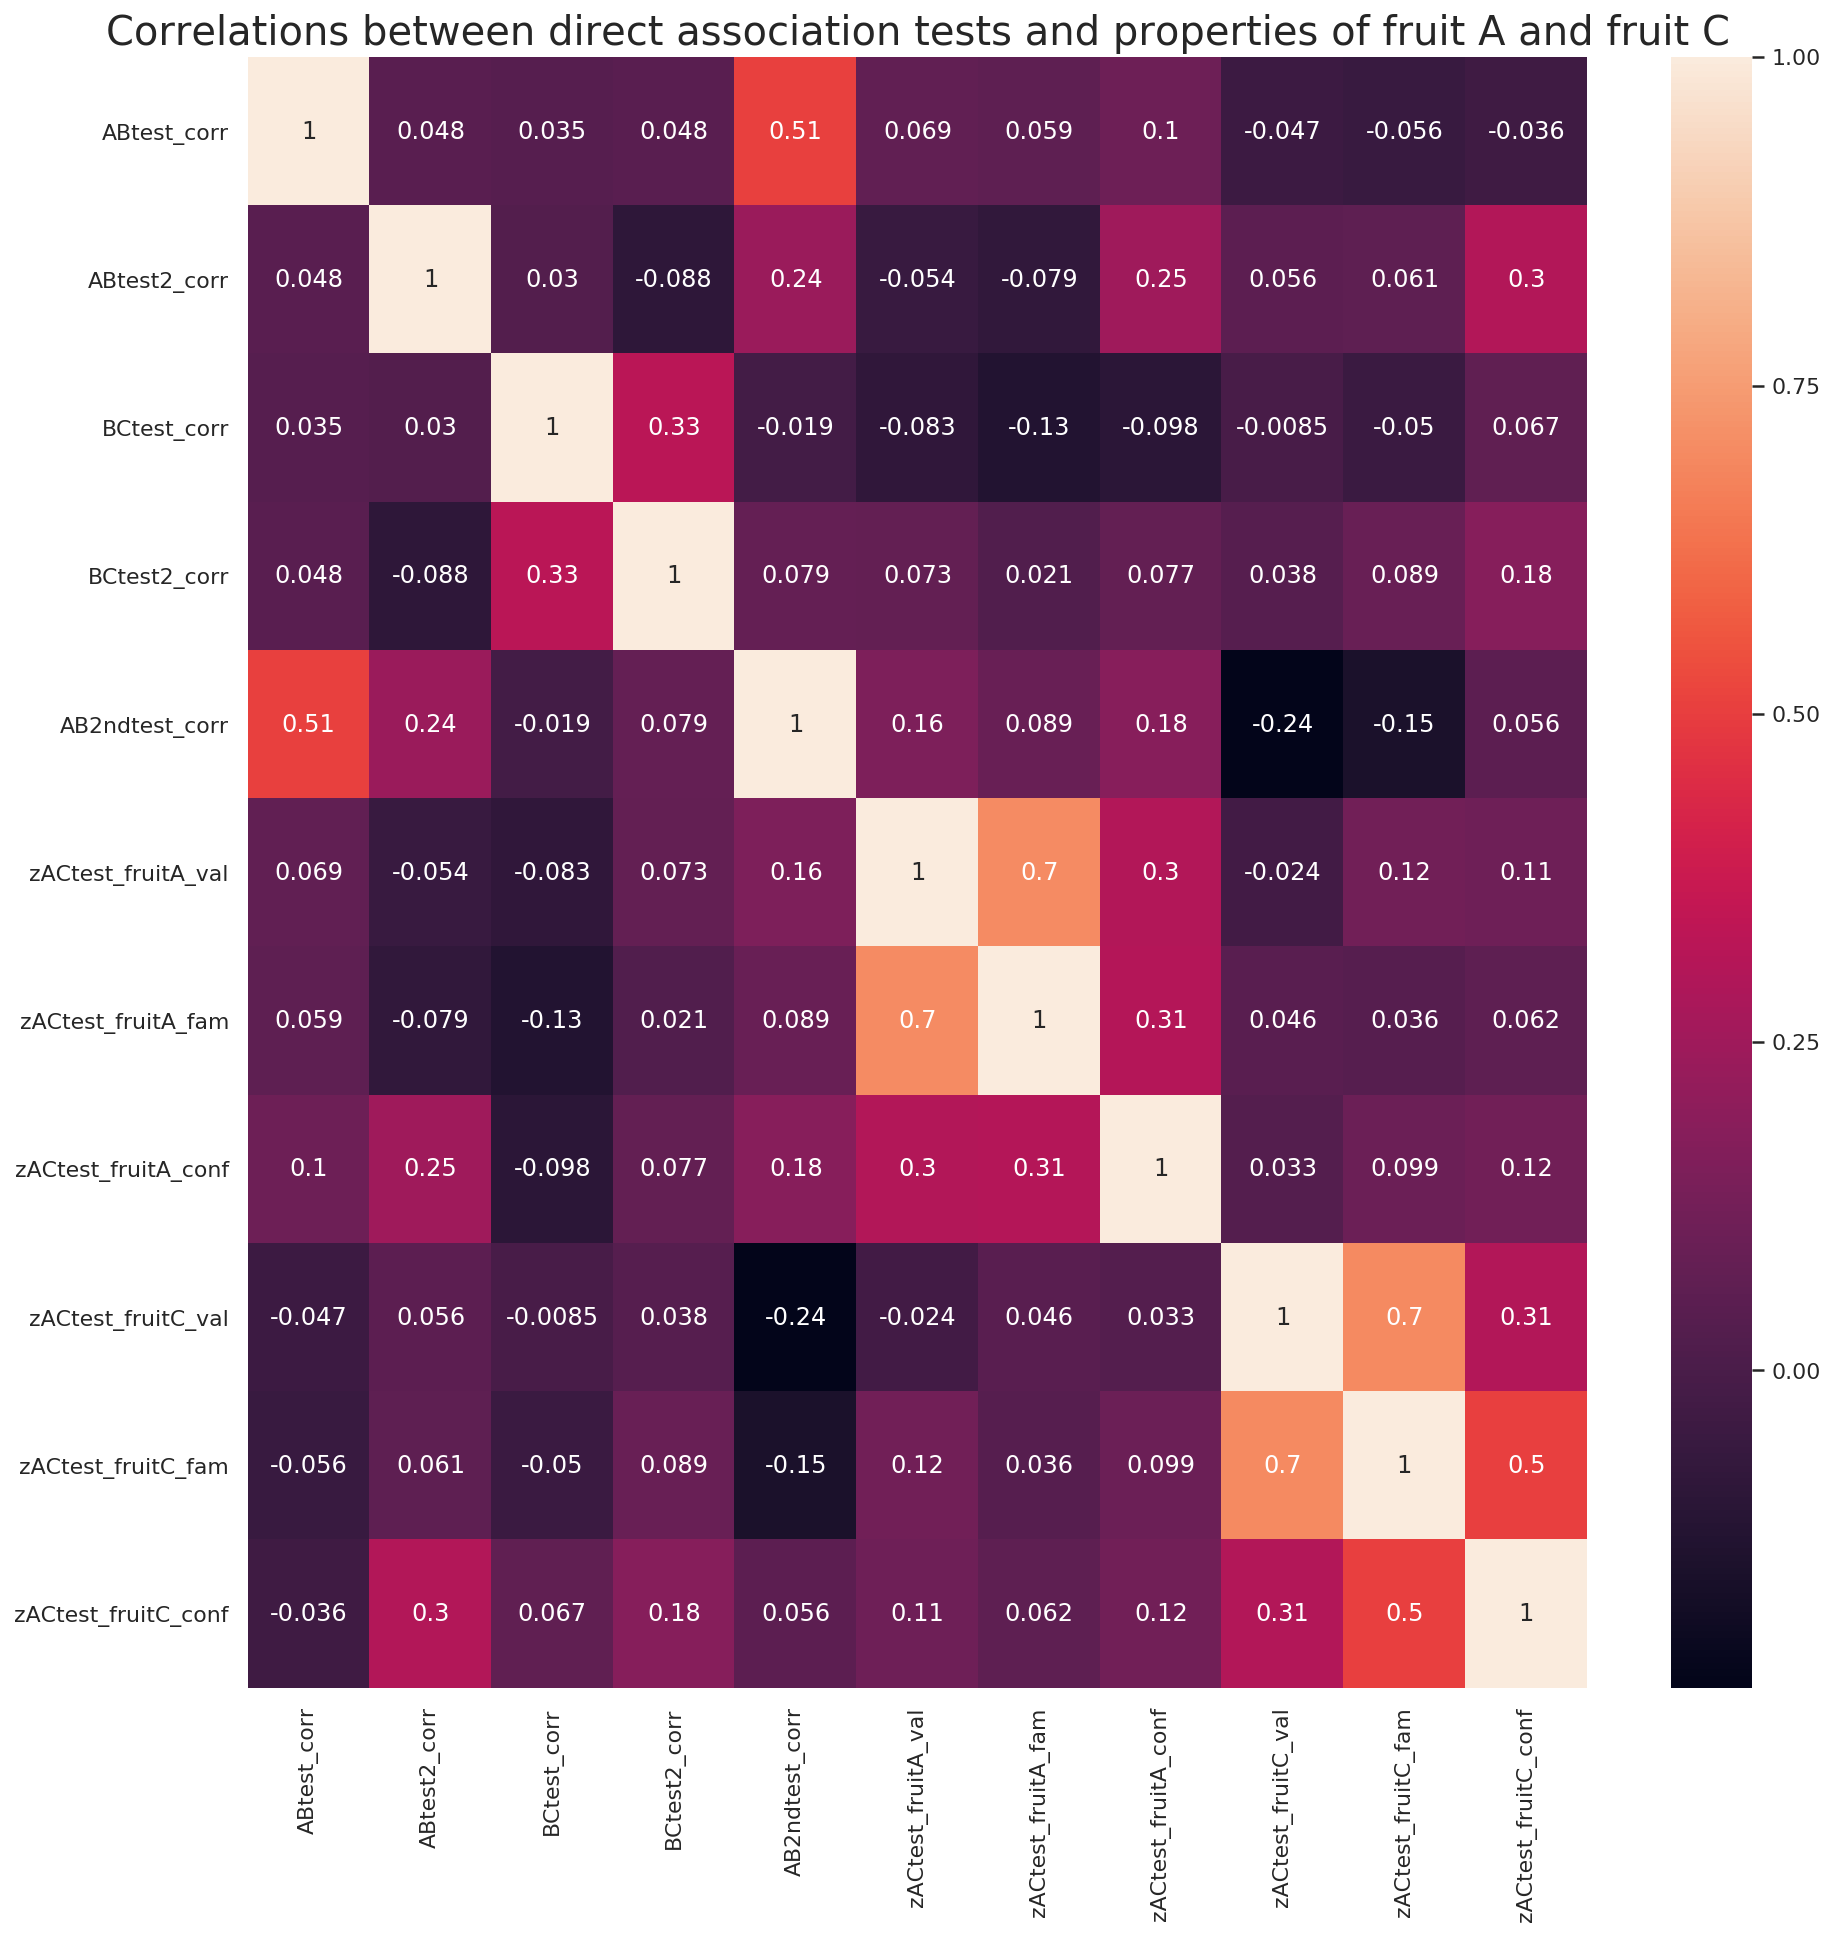

In [127]:
dataColsSelected = data_infer.loc[:,  ['ABtest_corr','ABtest2_corr', 'BCtest_corr','BCtest2_corr','AB2ndtest_corr',  'zACtest_fruitA_val', 'zACtest_fruitA_fam', 'zACtest_fruitA_conf', 'zACtest_fruitC_val', 'zACtest_fruitC_fam', 'zACtest_fruitC_conf']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data_corr, 
    xticklabels=data_corr.columns,
     yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations between direct association tests and properties of fruit A and fruit C',fontsize=20)

<font size = '4'>
The final round of AB test performance was negatively correlated with fruit C value (-0.24) and familiarity (-0.15). The following is the boxplot graph which I excluded the data which subjects did not remember the fruit A during the second round of AB test.
    <font>

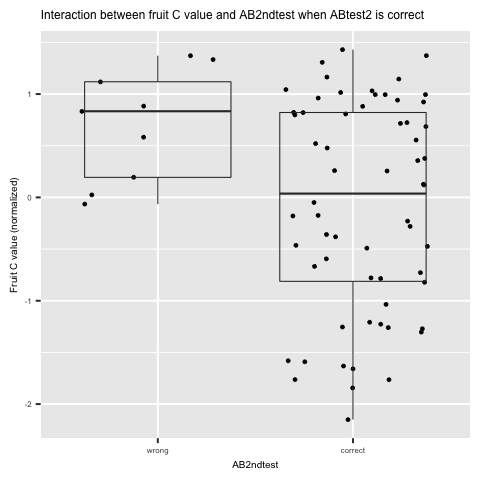

In [143]:
%%R
sub_df <- filter(data_infer, ABtest2_corr == 1)

ggplot(sub_df, aes(factor(AB2ndtest_corr, labels=c("wrong","correct")), zACtest_fruitC_val)) +
    geom_jitter() + stat_boxplot(fill = NA) + labs(title = "Interaction between fruit C value and AB2ndtest when ABtest2 is correct") + xlab("AB2ndtest") + ylab("Fruit C value (normalized)") + theme(text = element_text(size=10))

In [128]:
%%R
model_AC1 = glm(AB2ndtest_corr ~  zACtest_fruitC_val, data=data_infer, family=binomial(link="logit"))
summary(model_AC1)


Call:
glm(formula = AB2ndtest_corr ~ zACtest_fruitC_val, family = binomial(link = "logit"), 
    data = data_infer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0850   0.2734   0.4344   0.6875   0.8872  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)          1.9954     0.4028   4.954 7.28e-07 ***
zACtest_fruitC_val  -0.8847     0.4467  -1.981   0.0476 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 62.532  on 74  degrees of freedom
Residual deviance: 57.555  on 73  degrees of freedom
AIC: 61.555

Number of Fisher Scoring iterations: 5



<font size = '4'>

* Though it can be a coincidence, it also can be due to the fact that when fruit C's value and familiarity was higher to subject, the interference effect of BC memorization and test was stronger so that subjects was more likely to forget fruit A-container pairing.
<font>

In [129]:
# %%R
##Participant wise ggplot
# ggplot(data_infer, aes(factor(ACtest_corr, labels=c("wrong","correct")), FruitA_fam, color = factor(Participant))) +
#     geom_jitter() + stat_boxplot(fill = NA) + labs(title = "Participant-wise Familiarity for Fruit A") + xlab("ACtest") + ylab("FruitA Familiarity") + theme(text = element_text(size=20))

# Part 3: Lure Word Task

In [83]:
%%R
exp_list <- read.csv(file = "exp_list2_true_pilot.csv", header=TRUE, sep=",")

In [84]:
%%R
# Convert the variable dose from a numeric to a factor variable
exp_list$Serial_position <- as.factor(exp_list$Serial_position)

<font size = '4'> The Probability of free recall by word's serial position <font>

R[write to console]: `stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



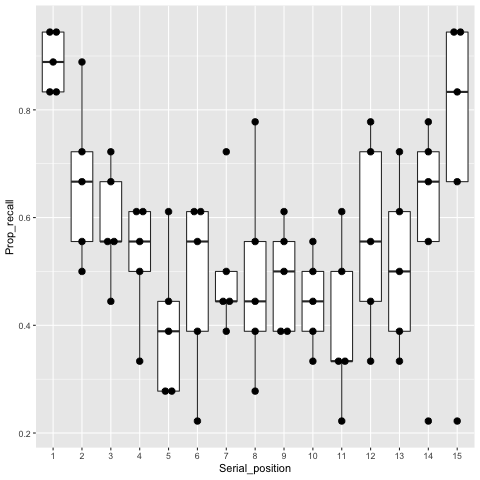

In [85]:
%%R
p <- ggplot(exp_list, aes(x=Serial_position, y=Prop_recall)) + 
  geom_boxplot() + geom_dotplot(binaxis='y', stackdir='center', dotsize=0.5)
p

<font size = '4'>
    
* Primacy and recency effects can be seen from the pilot data. The mean recall rate (around 0.5) was good for words in all serial positions.
    <font>

# Part 4: Group level analysis


In [146]:
data_group = pd.read_csv( "exp_infer_group_true_pilot.csv")
data_group.head()
%R -i data_group

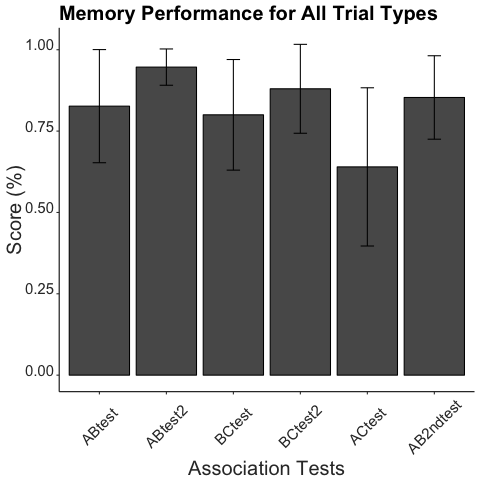

In [165]:
%%R
long_DF <- data_group %>% gather(Association_Tests, Score, c(ABtest_corr_per, ABtest2_corr_per, BCtest_corr_per, BCtest2_corr_per, ACtest_corr_per, AB2ndtest_corr_per), factor_key = TRUE)
summary_DF <- long_DF %>% group_by(Association_Tests) %>% dplyr::summarize(mean = mean(Score), sd =sd(Score))

# Default bar plot
p<- ggplot(summary_DF, aes(x=Association_Tests, y=mean)) + 
  geom_bar(stat="identity", color="black", 
           position=position_dodge()) +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2,
                 position=position_dodge(.9)) 
# Finished bar plot
p+labs(title="Memory Performance for All Trial Types", x="Association Tests", y = "Score (%)")+
   theme_classic() +scale_x_discrete(labels=c("ABtest", "ABtest2", "BCtest", "BCtest2", "ACtest", "AB2ndtest")) +
theme(plot.title = element_text(face = 'bold', size = 20),
    axis.text.x = element_text(color = "grey20", size = 15, angle = 45, hjust = .5, vjust = .5, face = "plain"),
        axis.text.y = element_text(color = "grey20", size = 15, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
        axis.title.x = element_text(color = "grey20", size = 20, angle = 0, hjust = .5, vjust = 0, face = "plain"),
        axis.title.y = element_text(color = "grey20", size = 20, angle = 90, hjust = .5, vjust = .5, face = "plain"))


<font size = '4'>**Hypothesis:** Having high preference violation score would decrease indirect association score (AC test), but it would have less effect on direct association score (AB and BC tests). Meanwhile, higher preference violation score would predict less critical word intrusion.<font>

In [92]:
x_variable = 'Like_violation'
x_varlabel =  'Preference violation'
y_variable = 'ACtest_corr_per'
y_varlabel = 'ACtest performance (%)'

Pearson's r = -0.515 p =  0.375


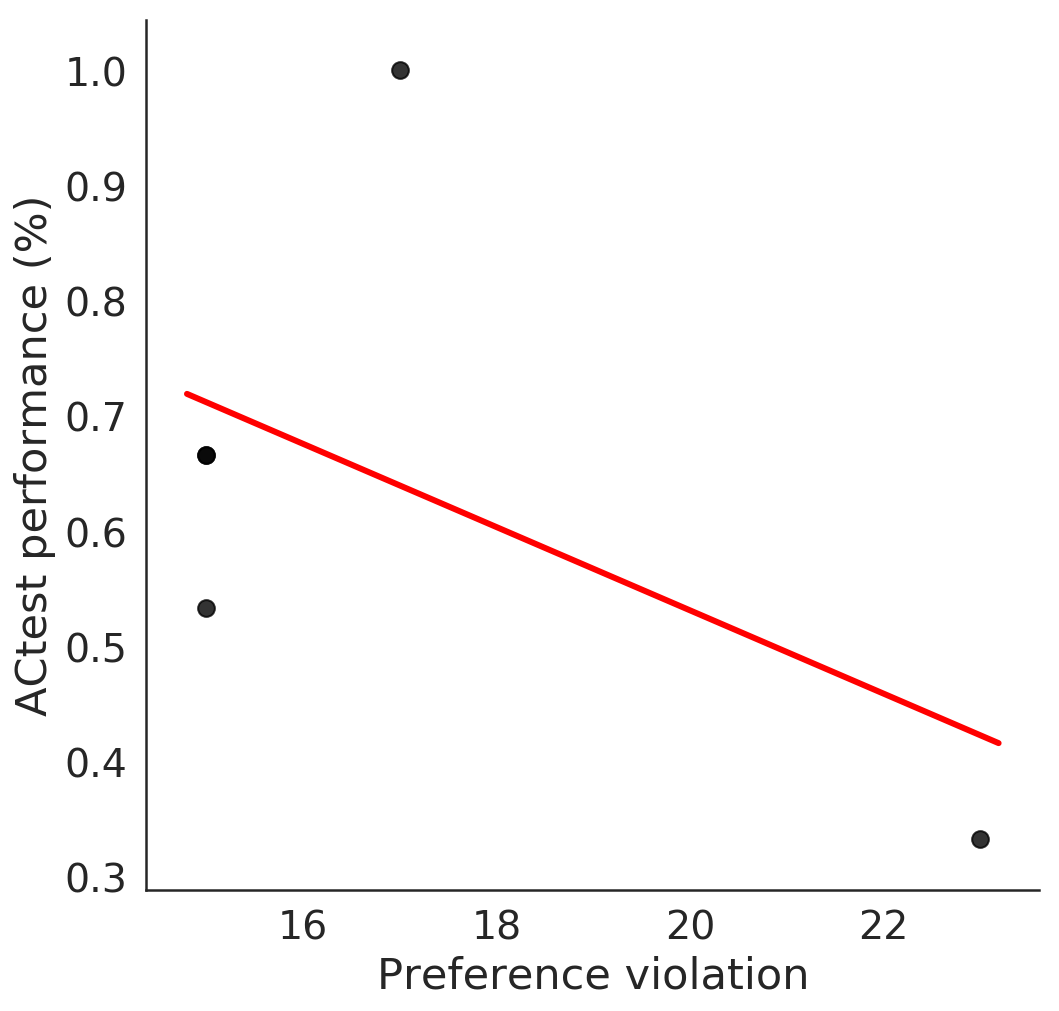

In [93]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_group, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_group[x_variable]
y=data_group[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_group[x_variable], data_group[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

In [144]:
x_variable = 'Like_violation'
x_varlabel =  'Preference violation'
y_variable = 'crit_intrusion'
y_varlabel =  'Critical Intrusion'

Pearson's r = -0.598 p =  0.287


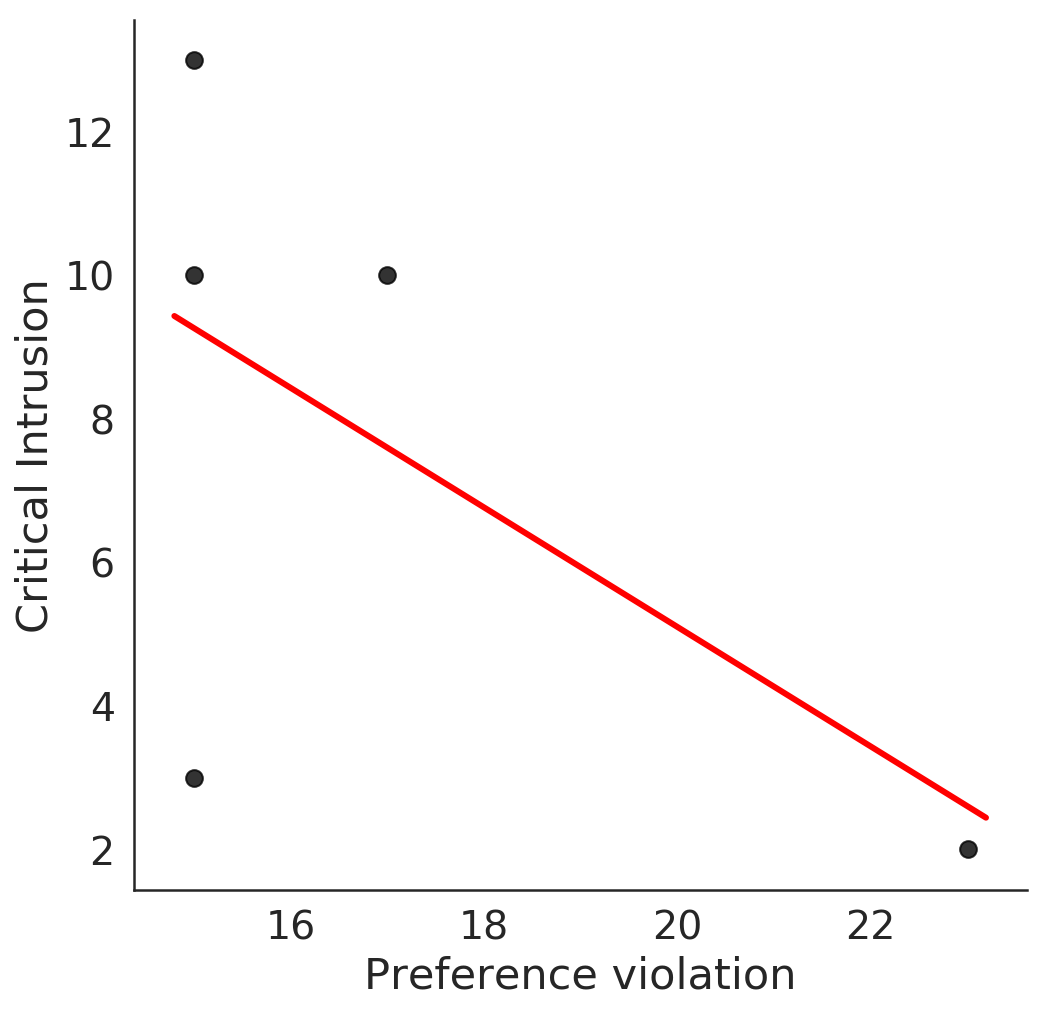

In [145]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_group, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_group[x_variable]
y=data_group[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_group[x_variable], data_group[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

In [96]:
# %%R
# exp_infer_group_long <- melt(exp_infer_group, id = c("Like_violation", "Participant", "ABtest_corr", "BCtest_corr"))
# #head(exp_infer_group_long)
# ggplot(exp_infer_group_long, aes(x=Like_violation, y=value, color = variable)) +
#        geom_line () +
#        ylab("P(correct)") + 
#        xlab("Preference Violation") +
#        theme(text = element_text(size=20))

*   <font size = '4'> Despite being in correct direction, the linear relationship is weak for both between preference violation and associative inference, and between critical intrusion of lure word and associative inference. <font>

# Appendix

<span style="font-size:1.5em;">Dichotomize variables</span>

In [100]:
%%R
library(sjmisc)

R[write to console]: Learn more about sjmisc with 'browseVignettes("sjmisc")'.

R[write to console]: 
Attaching package: ‘sjmisc’


R[write to console]: The following object is masked from ‘package:tidyr’:

    replace_na




In [101]:
%%R
data_trans <- read.csv(file = "exp_trans_true_pilot.csv", header=TRUE, sep=",")
data_trans <- dicho(data_trans, zConfidence, suffix = "_dich")
write.csv(data_trans, file = 'exp_trans_true_pilot.csv', row.names = FALSE)

R[write to console]: Package `snakecase` needs to be installed for case-conversion.



<span style="font-size:1.5em;">Define Functions</span>

In [4]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

In [5]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

**for regression coefficient plots**

In [6]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [7]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=30)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#000000'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [8]:
%%R
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib
LAPACK: /Users/haonan/anaconda3/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] reshape2_1.4.3   dplyr_0.8.0.1    broom_0.5.0      MASS_7.3-51.4   
[5] ggplot2_3.1.1    optimx_2018-7.10 lme4_1.1-21      Matrix_1.2-17   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1        pillar_1.3.1      compiler_3.5.1    nloptr_1.2.1     
 [5] plyr_1.8.4        boot_1.3-22       tibble_2.1.1      nlme_3.1-137     
 [9] gtable_0.3.0      lattice_0.20-35   pkgconfig_2.0.2   rlang_0.3.4      
[13] withr_2.1.2       stringr_1.3.1     grid_3.5.1

In [156]:
%%R
library(dplyr)